# _Data Computing_ 2
Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

---

```{admonition} Revised
19 Jun 2023
```
```{contents}
```

---

## Programming Environment

In [1]:
# install.packages('devtools')
# devtools::install_github('mdbeckman/dcData')

packages <- c(
  'data.table', # library(data.table)
  'dcData',     # library(dcData)
  'foreign',    # library(foreign)
  'leaflet',    # library(leaflet)
  'lubridate',  # library(lubridate)
  'mosaic',     # library(mosaic)
  'mosaicData', # library(mosaicData)
  'Rcpp',       # library(Rcpp)
  'rvest',      # library(rvest)
  'tidyverse'   # library(tidyverse)
)

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Load packages
invisible(lapply(packages, library, character.only = TRUE))

str_c('EXECUTED : ', now())
sessionInfo()
# R.version.string # R.Version()
# .libPaths()
# installed.packages()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: ‘mosaic’


The following objects are masked from ‘package:dplyr’:

    count, do, tally


The following object is masked from ‘package:Matrix’:

    mean


The following object is masked from ‘package:ggplot2’:

    stat


The following objects are masked from ‘package:stats’:

    binom.test, cor, cor.test, cov, fivenum, IQR, median, prop.test,
    quantile, sd, t.test, var


The following o

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ stringr 1.5.0
✔ purrr   1.0.1     ✔ tibble  3.2.1
✔ readr   2.1.4     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()        masks data.table::between()
✖ mosaic::count()         masks dplyr::count()
✖ purrr::cross()          masks mosaic::cross()
✖ mosaic::do()            masks dplyr::do()
✖ tidyr::expand()         masks Matrix::expand()
✖ dplyr::filter()         masks stats::filter()
✖ dplyr::first()          masks data.table::first()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ lubridate::hour()       masks data.table::hour()
✖ lubridate::isoweek()    masks data.table::isoweek()
✖ dplyr::lag()            masks stats::lag()
✖ dplyr::last()           masks data.table::last()
✖ lubridate::mday()       masks data.table::mday()
✖ lubridate::minute()     masks data.table::minute()
✖ lubridate::month()      m

[1] "EXECUTED : 2023-06-21 16:32:31.862983"

R version 4.3.0 (2023-04-21)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Ventura 13.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] forcats_1.0.0      stringr_1.5.0      purrr_1.0.1        readr_2.1.4       
 [5] tidyr_1.3.0        tibble_3.2.1       tidyverse_2.0.0    rvest_1.0.3       
 [9] Rcpp_1.0.10        mosaic_1.8.4.2     mosaicData_0.20.3  ggformula_0.10.4  
[13] dplyr_1.1.2        Matrix_1.5-4       ggplot2_3.4.2      lattice_0.21-8    
[17] lubridate_1.9.2    leaflet_2.1.2.9000 foreign_0.8-84     dcData_0.1.0      
[21]

````{admonition} Issue
:class: danger

Issues using [Leaflet](https://rstudio.github.io/leaflet/) (and the [terra](https://rspatial.org/index.html) dependency in particular) in VSCode on macOS.

The following is an attempted, but so far failed, approach.

```
brew install gdal proj
```

```r
remotes::install_github("rspatial/terra", configure.args = "--with-gdal-config=/opt/homebrew/bin/gdal-config --with-proj-include=/opt/homebrew/opt/proj/include --with-proj-lib=/opt/homebrew/opt/proj/lib --with-proj-share=/opt/homebrew/opt/proj/share/proj", type = "source", force = TRUE)
```

````

---

## 02 - Computing with R

In [2]:
data(package = 'dcData')

Data sets in package ‘dcData’:

BabyNames               Names of children as recorded by the US Social
                        Security Administration.
CountryCentroids        Geographic locations of countries
CountryData             Many variables on countries from the CIA
                        factbook (2014)
CountryGroups           Membership in Country Groups
DirectRecoveryGroups    Descriptions of the Direct Recovery Groups
                        (DRGs) in the Medicare data.
HappinessIndex          World Happiness Report Data
MedicareCharges         Charges to and Payments from Medicare
MedicareProviders       Medicare Providers
MigrationFlows          Human Migration between Countries
Minneapolis2013         Ballots in the 2013 Mayoral election in
                        Minneapolis
Minneapolis2017         Ballots in the 2017 Mayoral election in
                        Minneapolis
NCHS                    Health Statistics Data 1999-2004
NCI60                   Gene expression 

In [3]:
data('NCHS', package = 'dcData')

In [4]:
View(NCHS)

sex    age pregnant ethnicity          death                followup
1     female  2  no       Non-Hispanic Black NA                   NA      
2     male   77  no       Non-Hispanic White alive                90      
3     female 10  no       Non-Hispanic White NA                   NA      
4     male    1  no       Non-Hispanic Black NA                   NA      
5     male   49  no       Non-Hispanic White alive                74      
6     female 19  no       Other/Multi        alive                86      
7     female 59  no       Non-Hispanic Black alive                76      
8     male   13  no       Non-Hispanic White NA                   NA      
9     female 11  no       Non-Hispanic Black NA                   NA      
10    male   43  no       Non-Hispanic Black alive                79      
11    male   15  no       Non-Hispanic White NA                   NA      
12    male   37  no       Non-Hispanic White alive                82      
13    male   70  no       Mexican American   cardiovascular death 16      
14    male   81  no       Non-Hispanic White alive                85      
15    female 38  no       Non-Hispanic White alive                92      
16    female 85  no       Non-Hispanic Black other                62      
17    male    2  no       Non-Hispanic Black NA                   NA      
18    female  1  no       Non-Hispanic White NA                   NA      
19    male    0  no       Mexican American   NA                   NA      
20    female 23  yes      Mexican American   alive                86      
21    male   18  no       Mexican American   alive                87      
22    female 13  no       Non-Hispanic Black NA                   NA      
23    female 12  no       Non-Hispanic Black NA                   NA      
24    female 53  no       Non-Hispanic White alive                72      
25    female 42  no       Non-Hispanic White alive                84      
26    female 14  no       Mexican American   NA                   NA      
27    male   18  no       Mexican American   alive                85      
28    male   18  no       Non-Hispanic White alive                91      
29    male   62  no       Non-Hispanic White other                26      
30    female  7  no       Non-Hispanic Black NA                   NA      
⋮     ⋮      ⋮   ⋮        ⋮                  ⋮                    ⋮       
31097 female 40  no       Non-Hispanic White alive                NA      
31098 male   83  no       Non-Hispanic White alive                26      
31099 female 17  no       Mexican American   NA                   NA      
31100 male   85  no       Non-Hispanic White alive                NA      
31101 female 46  no       Non-Hispanic White alive                31      
31102 female 33  yes      Other/Multi        alive                47      
31103 male    0  no       Other/Multi        NA                   NA      
31104 female  4  no       Mexican American   NA                   NA      
31105 male   40  no       Non-Hispanic Black alive                31      
31106 female  0  no       Mexican American   NA                   NA      
31107 male   12  no       Non-Hispanic Black NA                   NA      
31108 female 72  no       Non-Hispanic White alive                27      
31109 female 26  yes      Other/Multi        alive                25      
31110 female 14  no       Mexican American   NA                   NA      
31111 male   34  no       Non-Hispanic White alive                31      
31112 male   13  no       Mexican American   NA                   NA      
31113 male   12  no       Non-Hispanic White NA                   NA      
31114 female 55  no       Non-Hispanic White alive                31      
31115 female 19  no       Mexican American   alive                36      
31116 female 54  no       Non-Hispanic White alive                47      
31117 female  2  no       Non-Hispanic White NA                   NA      
31118 female 16  no       Mexic

In [5]:
SmallNCHS <- sample_n(tbl = NCHS, size = 100)
head(SmallNCHS)

sex    age pregnant ethnicity          death followup smoker diabetic height
1 female 17  yes      Mexican American   NA    NA       no     0        1.549 
2 female  7  no       Non-Hispanic Black NA    NA       no     0        1.508 
3 female 37  no       Mexican American   alive 82       no     0        1.476 
4 male   24  no       Mexican American   alive 58       no     0        1.882 
5 male   14  no       Non-Hispanic Black NA    NA       no     0        1.658 
6 male    1  no       Non-Hispanic White NA    NA       no     0           NA 
  weight ⋯ bmd    fmhm_other hdl chol bps bpd income pop_weight psu stratum
1  55.7  ⋯     NA -0.41705   44  150  112 60  3.54   1184.323   2   15     
2  61.6  ⋯     NA       NA   47  163   NA NA  1.24   3270.427   1   16     
3  65.5  ⋯ 1.0710 -0.53363   50  199   95 66  1.51   5111.863   2    6     
4 146.3  ⋯ 1.3994  0.74849   42  240  125 76  2.13   7147.350   1   15     
5  60.0  ⋯ 1.1260 -0.71278   55  144  100 37  1.82   2610.932   2   36     
6    NA  ⋯     NA       NA   NA   NA   NA NA  5.00      0.000   1    8

In [6]:
Motors <- readr::read_csv('https://mdbeckman.github.io/dcSupplement/data/engines.csv')
head(Motors)

Rows: 39 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Engine
dbl (8): mass, ncylinder, strokes, displacement, bore, stroke, BHP, RPM

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Engine             mass  ncylinder strokes displacement bore stroke BHP 
1 Webra Speedy       0.135 1         2        1.8         13.5 12.5   0.45
2 Motori Cipolla     0.150 1         2        2.5         15.0 14.0   1.00
3 Webra Speed 20     0.250 1         2        3.4         16.5 16.0   0.78
4 Webra 40           0.270 1         2        6.5         21.0 19.0   0.96
5 Webra 61 Blackhead 0.430 1         2       10.0         24.0 22.0   1.55
6 Webra 6WR          0.490 1         2       10.0         24.0 22.0   2.76
  RPM  
1 22000
2 26000
3 22000
4 15500
5 14000
6 19000

In [7]:
data('CPS85', package = 'mosaicData')
head(CPS85)

wage educ race sex hispanic south married exper union age sector  
1  9.0 10   W    M   NH       NS    Married 27    Not   43  const   
2  5.5 12   W    M   NH       NS    Married 20    Not   38  sales   
3  3.8 12   W    F   NH       NS    Single   4    Not   22  sales   
4 10.5 12   W    F   NH       NS    Married 29    Not   47  clerical
5 15.0 12   W    M   NH       NS    Married 40    Union 58  const   
6  9.0 16   W    F   NH       NS    Married 27    Not   49  clerical

---

## 05 - Intro to data graphics

In [8]:
head(x = dcData::NCHS, n = 5)

sex    age pregnant ethnicity          death followup smoker diabetic height
1 female  2  no       Non-Hispanic Black NA    NA       no     0        0.916 
2 male   77  no       Non-Hispanic White alive 90       no     0        1.740 
3 female 10  no       Non-Hispanic White NA    NA       no     0        1.366 
4 male    1  no       Non-Hispanic Black NA    NA       no     0           NA 
5 male   49  no       Non-Hispanic White alive 74       yes    0        1.783 
  weight ⋯ bmd    fmhm_other hdl chol bps bpd income pop_weight psu stratum
1 12.5   ⋯     NA      NA    NA   NA   NA NA  0.86    2970.804  1   5      
2 75.4   ⋯ 1.2196 0.12359    54  215   98 56  5.00   10224.133  3   1      
3 32.9   ⋯     NA      NA    30  129  108 63  1.47   14172.311  2   7      
4 13.3   ⋯     NA      NA    NA   NA   NA NA  0.57    3041.593  1   2      
5 92.5   ⋯ 1.0870 1.17688    42  279  122 83  5.00   30657.312  2   8

In [9]:
head(x = dcData::NCI60, n = 5)

Probe  BR.MCF7 BR.MDA_MB_231 BR.HS578T BR.BT_549 BR.T47D CNS.SF_268
1 AT_D_3 -7.45   -7.51         -7.30     -7.37     -6.15   -7.16     
2 AT_D_5 -7.05   -6.62         -6.88     -6.78     -7.18   -7.25     
3 AT_D_M -7.05   -7.29         -7.30     -7.37     -7.61   -6.56     
4 AT_L_3 -7.32   -7.01         -7.22     -6.60     -7.45   -7.00     
5 AT_L_5 -7.38   -7.22         -7.30     -7.37     -7.70   -7.25     
  CNS.SF_295 CNS.SF_539 CNS.SNB_19 ⋯ PR.PC_3 PR.DU_145 RE.786_0 RE.A498 RE.ACHN
1 -7.03      -7.44      -7.43      ⋯ -6.88   -6.78     -7.25    -7.17   -6.51  
2 -7.22      -7.37      -7.26      ⋯ -6.27   -7.04     -6.68    -6.83   -6.65  
3 -7.63      -7.44      -7.43      ⋯ -6.45   -7.29     -7.25    -7.14   -6.53  
4 -7.32      -7.27      -7.39      ⋯ -6.30   -7.01     -6.73    -6.50   -6.37  
5 -7.61      -7.44      -7.43      ⋯ -6.48   -7.15     -7.06    -6.44   -6.47  
  RE.CAKI_1 RE.RXF_393 RE.SN12C RE.TK_10 RE.UO_31
1 -6.66     -6.53      -6.86    -7.03    -6.85   
2 -6.61     -6.23      -6.74    -6.85    -6.67   
3 -6.93     -6.17      -7.20    -6.93    -6.85   
4 -6.54     -7.07      -6.86    -6.55    -6.67   
5 -6.62     -7.00      -7.22    -6.89    -6.36

---

## 10 - More data verbs

In [10]:
head(x = dcData::CountryData, n = 5)

country        area    pop      growth birth death migr   maternal infant
1 Afghanistan     652230 31822848  2.29  38.84 14.12  -1.83 460      117.23
2 Akrotiri           123    15700    NA     NA    NA     NA  NA          NA
3 Albania          28748  3020209  0.30  12.73  6.47  -3.31  27       13.19
4 Algeria        2381741 38813722  1.88  23.99  4.31  -0.93  97       21.76
5 American Samoa     199    54517 -0.35  22.87  4.68 -21.64  NA        8.92
  life  ⋯ mainlines cell     netHosts netUsers airports railways roadways
1 50.49 ⋯   13500   18000000   223    1000000   52        NA      42150  
2    NA ⋯      NA         NA    NA         NA   NA        NA         NA  
3 77.96 ⋯  312000    3500000 15528    1300000    4       339      18000  
4 76.39 ⋯ 3200000   37692000   676    4700000  157      3973     113655  
5 74.91 ⋯   10000         NA  2387         NA    3        NA        241  
  waterways marine military
1 1200      NA       NA    
2   NA      NA       NA    
3   41      17     1.47    
4   NA      38     4.48    
5   NA      NA       NA

---

## 11 - Joining two data frames

In [11]:
head(x = dcData::MigrationFlows, n = 3) %>%
  select(destcode, origincode, Y2000)

destcode origincode Y2000 
1 FRA      AFG           923
2 FRA      DZA        425229
3 FRA      AUS          9168

In [12]:
head(x = dcData::CountryData, n = 6) %>%
  select(country, life, infant)

country        life  infant
1 Afghanistan    50.49 117.23
2 Akrotiri          NA     NA
3 Albania        77.96  13.19
4 Algeria        76.39  21.76
5 American Samoa 74.91   8.92
6 Andorra        82.65   3.69

In [13]:
head(x = dcData::CountryCentroids, n = 4) %>%
  select(name, iso_a3)

name        iso_a3
1 Afghanistan AFG   
2 Aland       ALA   
3 Albania     ALB   
4 Algeria     DZA

In [14]:
# to translate the variable `country` in table `CountryData`
# to the code `iso_a3`,
# join table `CountryCentroids` to table `CountryData`

InfantMortality <-
  CountryCentroids %>%
  select(name, iso_a3) %>%
  left_join(y = CountryData %>% select(country, infant),
            by = c('name' = 'country'))
head(x = InfantMortality, n = 6)

name           iso_a3 infant
1 Afghanistan    AFG    117.23
2 Aland          ALA        NA
3 Albania        ALB     13.19
4 Algeria        DZA     21.76
5 American Samoa ASM      8.92
6 Andorra        AND      3.69

In [15]:
# infant mortality of the destination country

MigrationFlows %>%
  left_join(y = InfantMortality, by = c('destcode' = 'iso_a3')) %>%
  head(n = 6) %>%
  select(sex, destcode, origincode, Y2000, name, infant)

sex  destcode origincode Y2000  name   infant
1 Male FRA      AFG           923 France 3.31  
2 Male FRA      DZA        425229 France 3.31  
3 Male FRA      AUS          9168 France 3.31  
4 Male FRA      AUT          7764 France 3.31  
5 Male FRA      AZE           118 France 3.31  
6 Male FRA      BLR           245 France 3.31

In [16]:
# infant mortality of the origin country

MigrationFlows %>%
  left_join(y = InfantMortality, by = c('origincode' = 'iso_a3')) %>%
  head(n = 6) %>%
  select(sex, destcode, origincode, Y2000, name, infant)

sex  destcode origincode Y2000  name        infant
1 Male FRA      AFG           923 Afghanistan 117.23
2 Male FRA      DZA        425229 Algeria      21.76
3 Male FRA      AUS          9168 Australia     4.43
4 Male FRA      AUT          7764 Austria       4.16
5 Male FRA      AZE           118 Azerbaijan   26.67
6 Male FRA      BLR           245 Belarus       3.64

In [17]:
head(x = dcData::CountryGroups, n = 5)

country G8   G20  GGG  
1 Canada  TRUE TRUE FALSE
2 France  TRUE TRUE FALSE
3 Germany TRUE TRUE FALSE
4 Italy   TRUE TRUE FALSE
5 Japan   TRUE TRUE FALSE

In [18]:
G8Countries <-
  CountryGroups %>%
  dplyr::filter(G8) %>%
  select(country)
G8Countries

country       
1 Canada        
2 France        
3 Germany       
4 Italy         
5 Japan         
6 Russia        
7 United Kingdom
8 United States

In [19]:
G8CountryData <-
  CountryData %>%
    inner_join(y = G8Countries, by = join_by(country))
G8CountryData %>%
  select(country, GDP, pop)

country        GDP       pop      
1 Canada         1.518e+12  34834841
2 France         2.276e+12  66259012
3 Germany        3.227e+12  80996685
4 Italy          1.805e+12  61680122
5 Japan          4.729e+12 127103388
6 Russia         2.553e+12 142470272
7 United Kingdom 2.387e+12  63742977
8 United States  1.672e+13 318892103

### Exercises

#### [11.1]

Most data verbs are one table-in one table-out (1I1O) whereas join data verbs are two table-in one table-out (2I1O).

In [20]:
dcData::BabyNames %>%
  group_by(year) %>%
    summarize(total = sum(count)) %>%
      head()

year total 
1 1880 201484
2 1881 192700
3 1882 221537
4 1883 216952
5 1884 243468
6 1885 240856

#### [11.2]

The value of the matching variable of row $n$ of the left table does not necessarily match the value of the matching variable of row $n$ of the right table.

#### [11.3]

In [21]:
head(x = dcData::ZipGeography, n = 5)

State    Population HousingUnits LandArea WaterArea CityName   PostOfficeName
1 New York     0          0         0.1      46.3     Holtsville Holtsville    
2 New York     0          0         0.0     170.3     Holtsville Holtsville    
3              0          0         0.0       4.7     Adjuntas   Adjuntas      
4          42042      15590        80.1       0.0     Aguada     Aguada        
5          55530      21626        78.7       0.1     Aguadilla  Aguadilla     
  County    AreaCode Timezone Latitude Longitude ZIP  
1 Suffolk   631      EST      40.92233 -72.63708 00501
2 Suffolk   631      EST      40.92233 -72.63708 00544
3 Adjuntas  787      EST+1    18.16527 -66.72258 00601
4 Aguada    787      EST+1    18.39310 -67.18095 00602
5 Aguadilla 787      EST+1    18.45591 -67.14578 00603

In [22]:
tail(x = dcData::ZipDemography, n = 5)

Totalpopulation Male Female MedianAge Under5years X18yearsandover
42737 1447             757  690   30.3      120          964           
42738  120              69   51   42.2        6           88           
42739   NA              NA   NA     NA       NA           NA           
42740 2424            1250 1174   39.6      148         1726           
42741   36              22   14   35.0        2           29           
      X65yearsandover Onerace White BlackorAfricanAmerican ⋯
42737  99             1329     141   4                     ⋯
42738  13              111     105   0                     ⋯
42739  NA               NA      NA  NA                     ⋯
42740 280             2191    1797   3                     ⋯
42741   1               36      33   0                     ⋯
      Medianfamilyincomedollars Percapitaincomedollars
42737 49803                     16176                 
42738 29750                     11742                 
42739    NA                        NA                 
42740 52917                     21688                 
42741 39792                     14332                 
      Familiesbelowpovertylevel Individualsbelowpovertylevel
42737 26                        113                         
42738  8                         53                         
42739 NA                         NA                         
42740 53                        235                         
42741  0                          0                         
      Singlefamilyowneroccupiedhomes Medianvaluedollars
42737 253                            104800            
42738  47                             80600            
42739  NA                                NA            
42740 438                            127600            
42741   0                                 0            
      Medianofselectedmonthlyownercosts WithaMortgage Notmortgaged ZIP  
42737 NA                                 648          325          99926
42738 NA                                 750          178          99927
42739 NA                                  NA           NA          99928
42740 NA                                1170          405          99929
42741 NA                                   0            0          99950

In [23]:
NewYork <-
  ZipGeography %>%
    left_join(y = ZipDemography, by = c('ZIP' = 'ZIP')) %>%
      filter(State == 'New York') %>%
        select(State, Population, Totalpopulation, Under5years, X18yearsandover, X65yearsandover) %>%
          transmute(
            State     = State,
            pop       = coalesce(Population, Totalpopulation),
            age0to4   = Under5years,
            age5to17  = pop - Under5years - X18yearsandover,
            age18to64 = X18yearsandover - X65yearsandover,
            age65plus = X65yearsandover,
            total     = age0to4 + age5to17 + age18to64 + age65plus,
            check1    = total == pop,
          )
head(x = NewYork, n = 5)

State    pop   age0to4 age5to17 age18to64 age65plus total check1
1 New York     0   NA       NA       NA        NA        NA   NA  
2 New York     0   NA       NA       NA        NA        NA   NA  
3 New York   289   NA       NA       NA        NA        NA   NA  
4 New York 17310  457     1213    13189      2451     17310 TRUE  
5 New York 84870 4149    12750    54797     13174     84870 TRUE

In [24]:
PopulationGroups <-
  ZipGeography %>%
    left_join(y = ZipDemography, by = c('ZIP' = 'ZIP')) %>%
      select(State, Population, Totalpopulation, Under5years, X18yearsandover, X65yearsandover) %>%
        transmute(
          State     = State,
          pop       = coalesce(Population, Totalpopulation),
          age0to4   = Under5years,
          age5to17  = pop - Under5years - X18yearsandover,
          age18to64 = X18yearsandover - X65yearsandover,
          age65plus = X65yearsandover,
          total     = age0to4 + age5to17 + age18to64 + age65plus,
          check1    = total == pop,
        ) %>%
          group_by(State) %>%
            summarize(
              total0to4   = sum(age0to4,    na.rm=TRUE),
              total5to17  = sum(age5to17,   na.rm=TRUE),
              total18to64 = sum(age18to64,  na.rm=TRUE),
              total65plus = sum(age65plus,  na.rm=TRUE),
              total       = sum(pop, na.rm=TRUE)
            ) %>%
              mutate(
                diff  = total - (total0to4 + total5to17 + total18to64 + total65plus),
                check = total0to4 + total5to17 + total18to64 + total65plus == total
              )
PopulationGroups

State                total0to4 total5to17 total18to64 total65plus total   
1                             0         0           0          0       741752
2  Massachusetts              0         0           0          0      6349048
3  New Hampshire              0         0           0          0      1235735
4  New York             1239375   3450540    11837416    2448224     18975844
5  Rhode Island               0         0           0          0      1048319
6  Maine                      0         0           0          0      1273094
7  Vermont                    0         0           0          0       608822
8  Connecticut                0         0           0          0      3405565
9  New Jersey                 0         0           0          0      8413990
10 Pennsylvania          727790   2194356     7439389    1919052     12280587
11 Delaware               51529    143043      487241     101712       783525
12 District of Columbia   32536     82456      387169      69898       572059
13 Maryland              353393   1002779     3341007     599307      5296486
14 Virginia              461957   1276186     4547561     792248      7077952
15 West Virginia         101791    300500     1128772     276833      1807896
16 North Carolina        539506   1424526     5116187     969035      8049254
17 Georgia               595087   1573898     5231348     785170      8185503
18 South Carolina        264656    744885     2516802     485272      4011615
19 Florida               945721   2700255     9526267    2807388     15979631
20 Alabama               295936    827248     2743296     579644      4446124
21 Mississippi           204273    570596     1725052     343378      2843299
22 Tennessee             374219   1022301     3582610     703259      5682389
23 Kentucky              266475    730021     2546187     504739      4047422
24 Ohio                  754924   2133383     6956963    1507732     11353002
25 Indiana               423215   1151181     3753258     752831      6080485
26 Michigan              672002   1923732     6123512    1218958      9938204
27 Iowa                  188416    545293     1756618     436232      2926559
28 Wisconsin             342340   1026416     3292356     702550      5363662
29 Minnesota             329597    957361     3038349     594262      4919569
30 North Dakota           39370    121280      386412      94365       641427
31 South Dakota           51054    151454      443889     108109       754506
32 Illinois              876539   2368834     7673666    1499998     12419037
33 Montana                54853    175212      551216     120960       902241
34 Missouri              369905   1057798     3412243     755444      5595390
35 Kansas                188684    524227     1619075     356199      2688185
36 Nebraska              117035    333140     1028660     232159      1710994
37 Louisiana             317160    901852     2730442     516492      4465946
38 Arkansas              181626    498826     1619048     374034      2673534
39 Oklahoma              236042    655289     2099793     455109      3446233
40 Texas                1624203   4260543    12888235    2071668     20844649
41 Colorado              297494    803274     2784280     416049      4301097
42 Arizona               382483    985121     3096256     667891      5131751
43 Idaho                  97558    270952      777971     145737      1292218
44 Utah                  209299    508994     1323734     190138      2232165
45 Wyoming                30935     97924      306976      57667       493502
46 New Mexico            130286    376732     1095624     211732      1814374
47 California           2486843   6762415    21019901    3595271     33864430
48 Nevada                145790    365847     1264174     218694      1994505
49 Hawaii                 78161    217601      755139     160588      1211489
50 Oregon                222906    623356     2135687     438070      3420019
51 Washington            

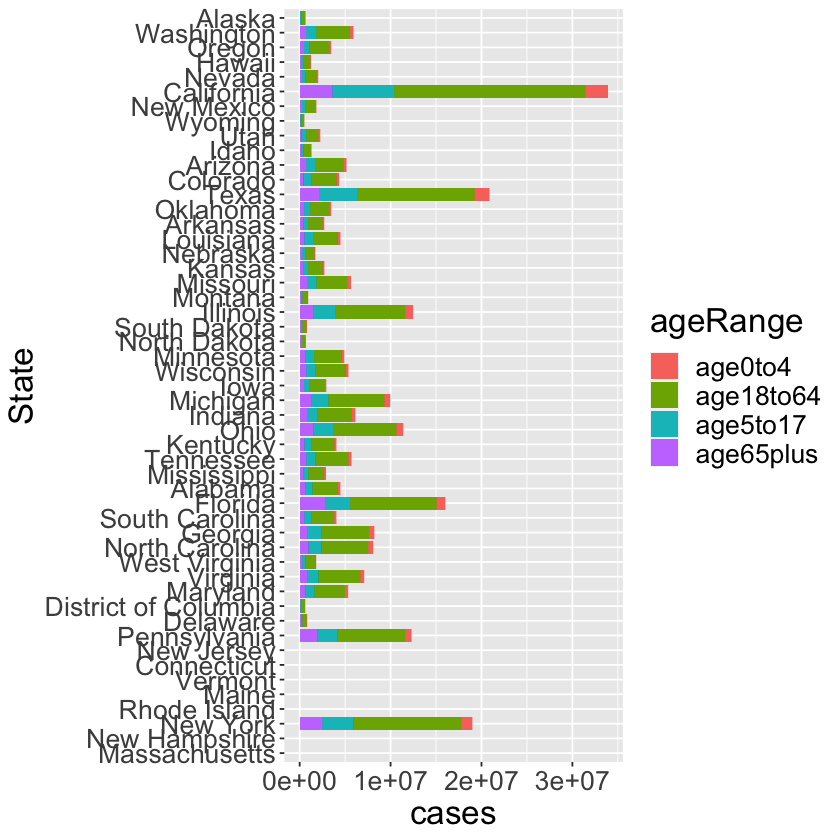

In [25]:
#options(repr.plot.width=20, repr.plot.height=20)

ZipGeography %>%
  filter(State != '') %>%
  left_join(y = ZipDemography, by = c('ZIP' = 'ZIP')) %>%
    select(State, Population, Totalpopulation, Under5years, X18yearsandover, X65yearsandover) %>%
      transmute(
        State     = State,
        ageTotal  = coalesce(Population, Totalpopulation, 0),
        age0to4   = coalesce(Under5years, 0),
        age5to17  = coalesce(ageTotal - Under5years - X18yearsandover, 0),
        age18to64 = coalesce(X18yearsandover - X65yearsandover, 0),
        age65plus = coalesce(X65yearsandover, 0)
      ) %>%
        pivot_longer(c(`age0to4`, `age5to17`, `age18to64`, `age65plus`), names_to = 'ageRange', values_to = 'cases') %>%
          ggplot() +
            geom_bar(
              mapping  = aes(y = State, x = cases, fill = ageRange),
              position = 'stack',
              stat     = 'identity',
              na.rm    = TRUE
            ) +
            theme(
              text=element_text(size=20)
            )

---

## 15 - Statistics

Data graphics
* translate each case into a representation in terms of a glyph's graphical attributes: color, position, shape, size, etc.

A representation for the collective properties of cases?
* collective properties: features of groups of cases
* summary functions: max, mean, median, etc.

Statistics
* an area of science concerned with characterizing case-to-case variation and the collective properties of cases, while also quantifying uncertainty

Data Science
* a collaboration between statistics and computer science

Confidence Interval

Confidence Band

How to display variation among cases? The distribution of values of one variable? The distribution of values of several variables?

### 15.2 - Density distribution of one variable

Warning message:
“Removed 2575 rows containing missing values (`geom_point()`).”


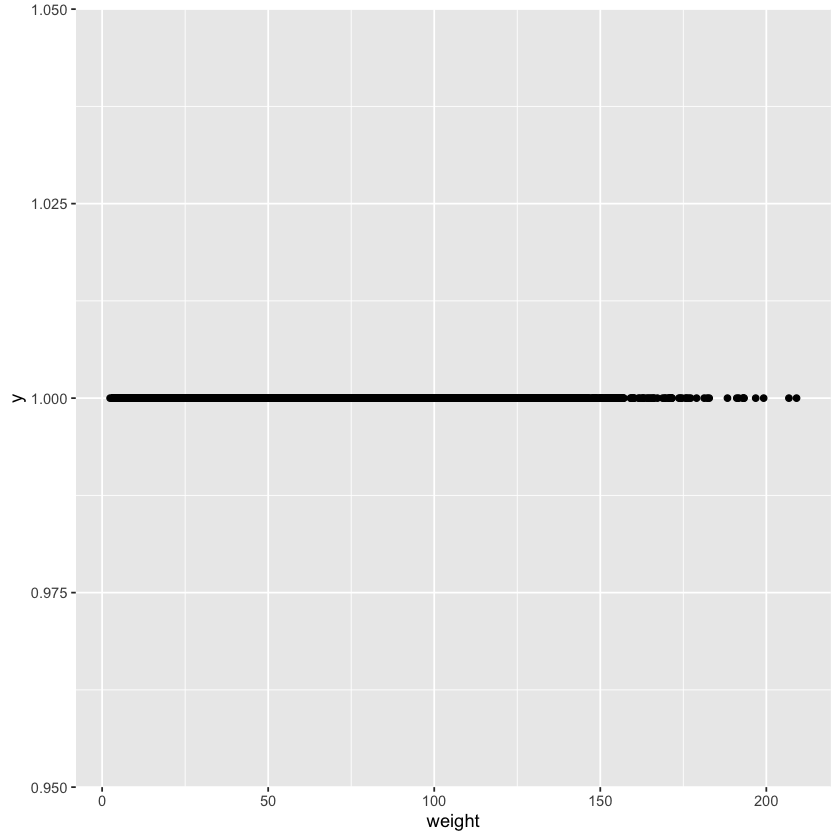

In [26]:
NCHS %>%
  ggplot(aes(weight, 1)) +
    geom_point()

Warning message:
“Removed 2575 rows containing missing values (`geom_point()`).”


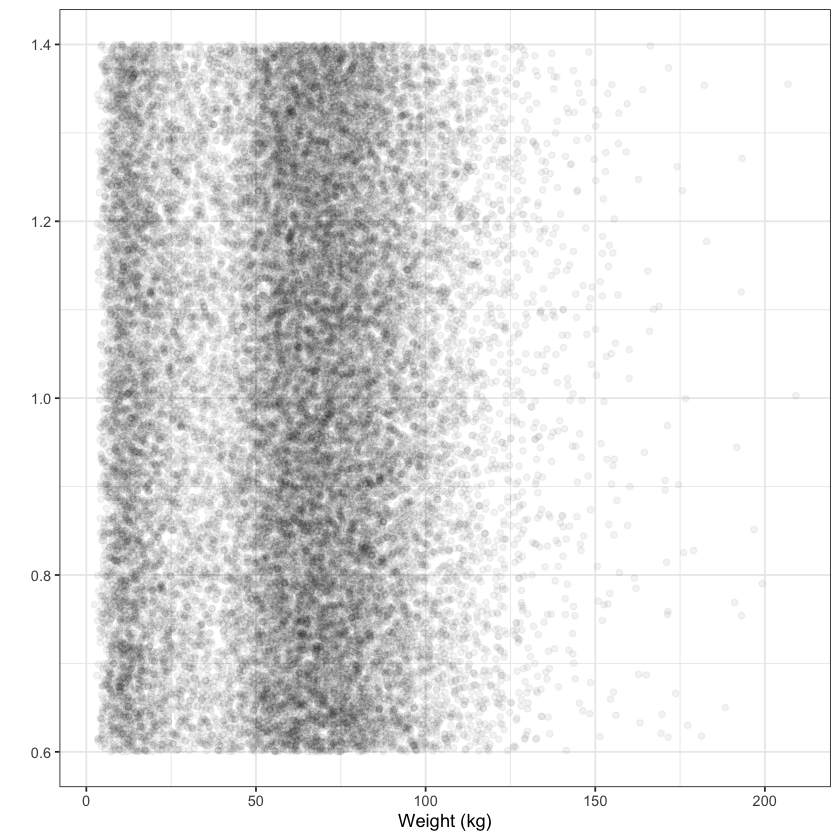

In [27]:
# density of cases, represented by the degree of darkness

NCHS %>%
  ggplot(aes(weight, 1)) +
    geom_point(alpha = 0.05, position = 'jitter') +
    xlab('Weight (kg)') +
    ylab('') +
    theme_bw() +
    scale_color_grey()

Warning message:
“Removed 2575 rows containing non-finite values (`stat_density()`).”


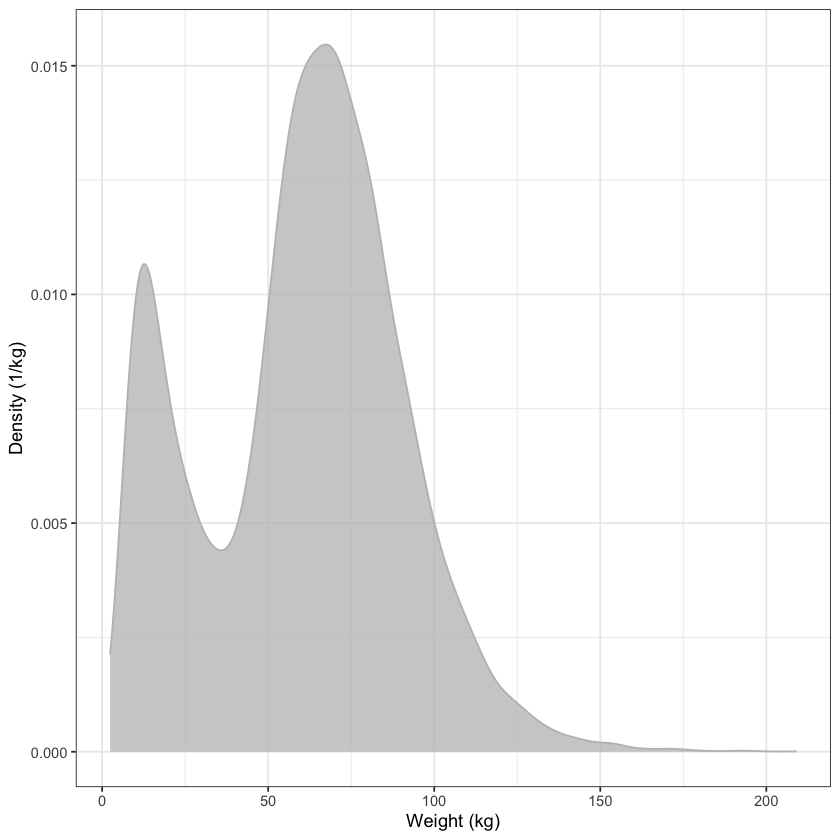

In [28]:
# density of cases, represented by the height of a function
# the scale of the y-axis has units of inverse kilograms
# the scale is arranged so that the area under the curve is equal to unity
# this convention facilitates densities for different groups; and means that narrow distributions tend to have high density

NCHS %>%
  ggplot(aes(weight)) +
    geom_density(color = 'gray', fill = 'gray', alpha = 0.75) +
    xlab('Weight (kg)') +
    ylab('Density (1/kg)') +
    theme_bw() +
    scale_color_grey()

Warning message:
“Removed 2575 rows containing non-finite values (`stat_density()`).”
Warning message:
“Removed 2575 rows containing missing values (`geom_point()`).”


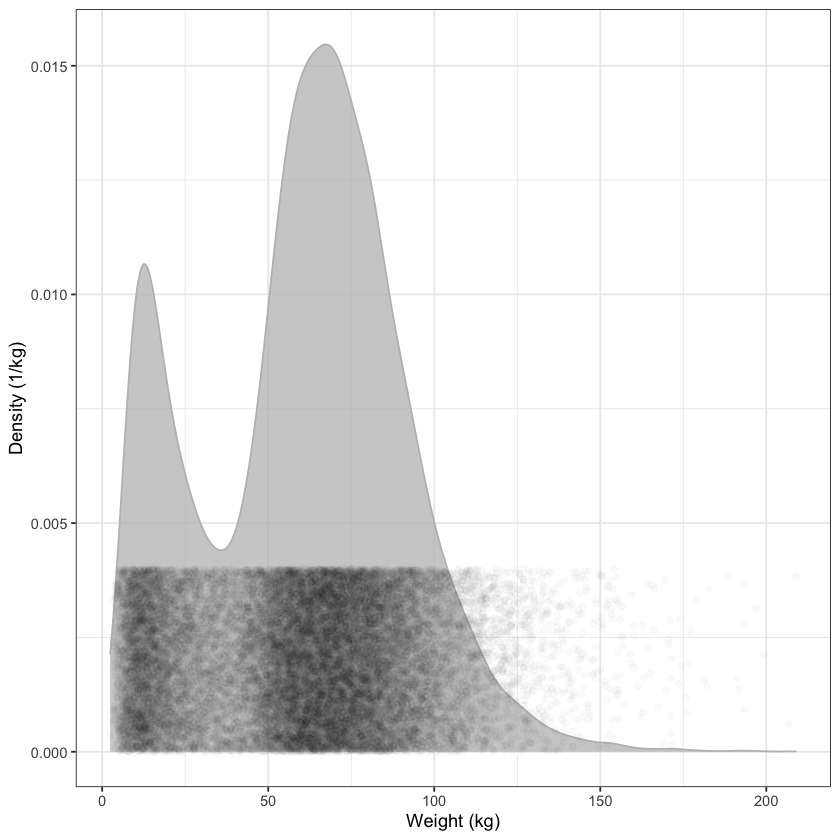

In [29]:
NCHS %>%
  ggplot(aes(weight)) +
    geom_density(color = 'gray', fill = 'gray', alpha = 0.75) +
    geom_point(
      alpha    = 0.02, 
      mapping  = aes(y = 0.002),
      position = position_jitter(height = 0.002)
    ) +
    xlab('Weight (kg)') +
    ylab('Density (1/kg)') +
    theme_bw() +
    scale_color_grey()

Warning message:
“Removed 2575 rows containing non-finite values (`stat_density()`).”


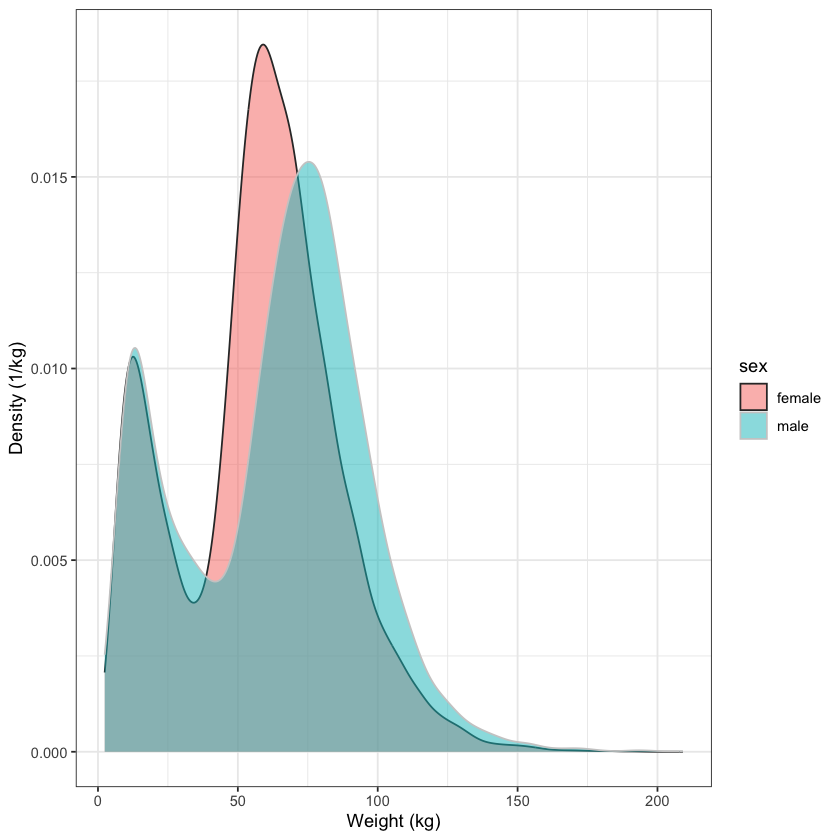

In [30]:
NCHS %>%
  ggplot(aes(x = weight, group = sex)) +
  geom_density(aes(color = sex, fill = sex), alpha = 0.5) +
  xlab('Weight (kg)') +
  ylab('Density (1/kg)') +
  theme(legend.position = 'top') +
  theme_bw() +
  scale_color_grey()

Warning message:
“Removed 2575 rows containing non-finite values (`stat_density()`).”


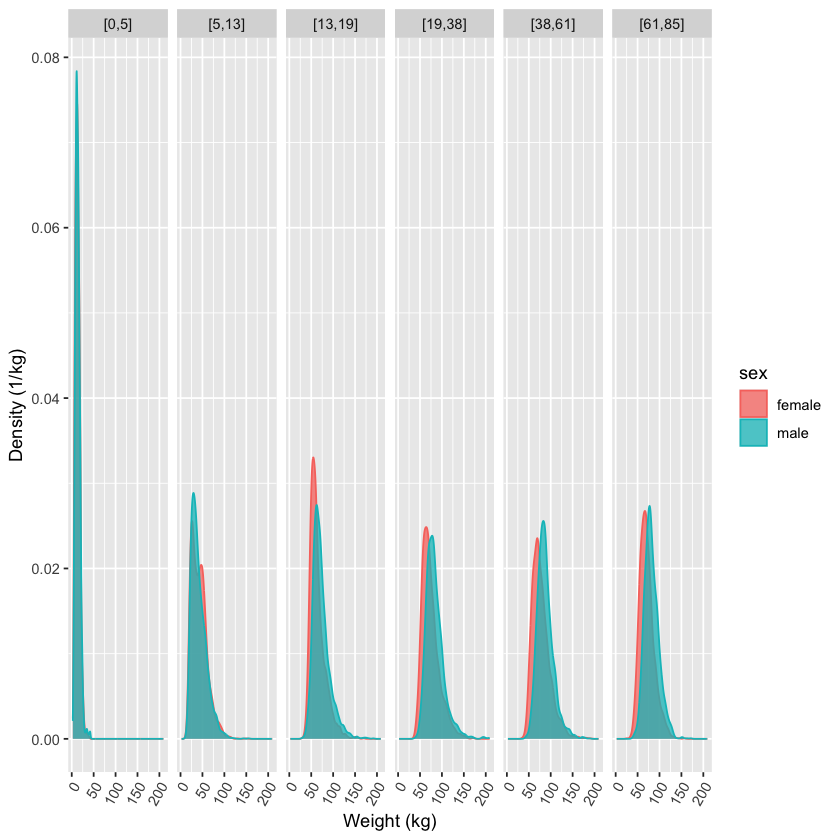

In [31]:
NCHS %>%
  mutate(ageGroup = mosaic::ntiles(x = age, n = 6, format = 'interval')) %>%
    ggplot(aes(x = weight, group = sex)) +
      geom_density(aes(color = sex, fill = sex), alpha = 0.75) +
      facet_wrap(~ ageGroup, nrow = 1) +
      xlab('Weight (kg)') +
      ylab('Density (1/kg)') +
      theme(axis.text.x = element_text(angle = 60, hjust = 1))

### 15.3 - Other depictions of density distribution

Warning message:
“Removed 2575 rows containing non-finite values (`stat_boxplot()`).”


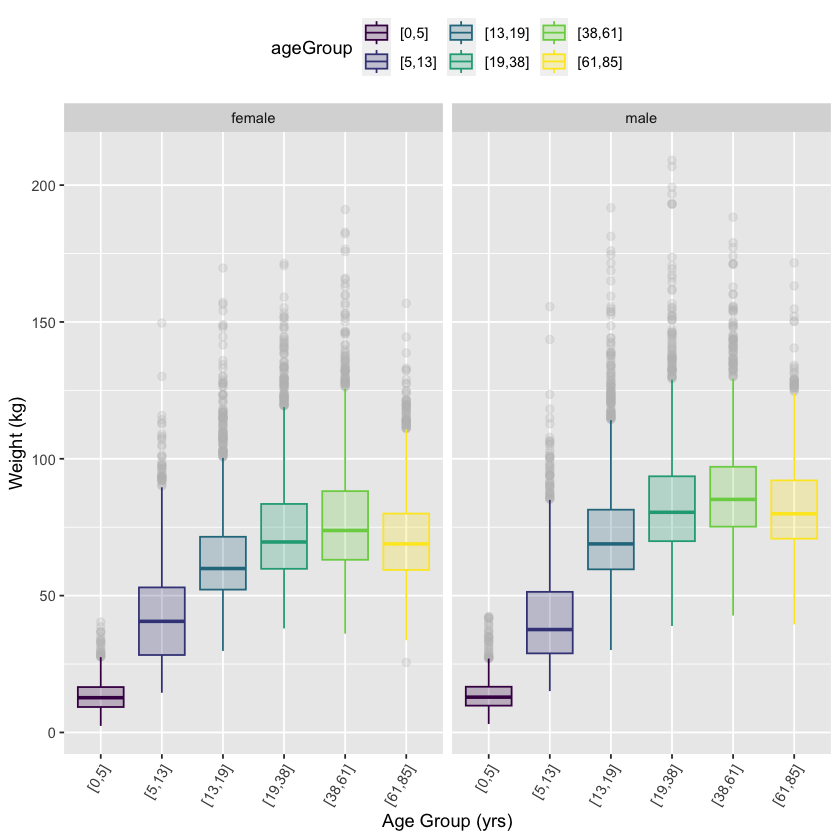

In [32]:
NCHS %>%
  mutate(ageGroup = mosaic::ntiles(x = age, n = 6, format = 'interval')) %>%
    ggplot(aes(y = weight, x = ageGroup)) +
      geom_boxplot(
        alpha         = 0.25,
        mapping       = aes(color = ageGroup, fill = ageGroup),
        outlier.color = 'gray',
        outlier.size  = 2
      ) +
      facet_wrap(~ sex) +
      xlab('Age Group (yrs)') +
      ylab('Weight (kg)') +
      theme(legend.position = 'top') +
      theme(axis.text.x = element_text(angle = 60, hjust = 1))

Warning message:
“Removed 2575 rows containing non-finite values (`stat_ydensity()`).”


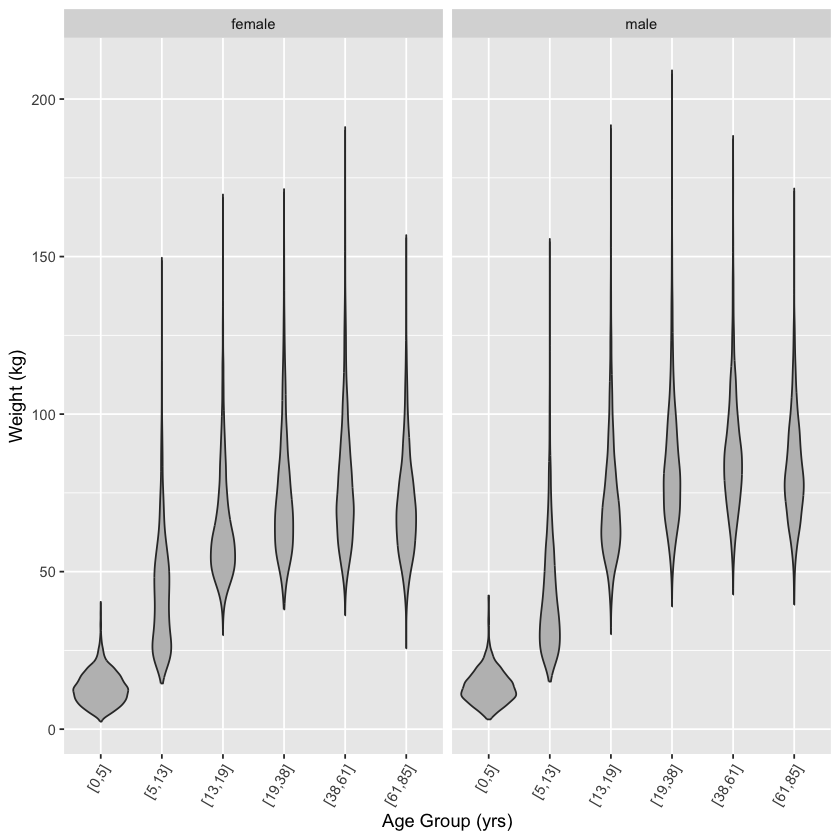

In [33]:
NCHS %>%
  mutate(ageGroup = mosaic::ntiles(x = age, n = 6, format = 'interval')) %>%
    ggplot(aes(y = weight, x = ageGroup)) +
      geom_violin(fill = 'gray') +
      facet_wrap(~ sex) +
      xlab('Age Group (yrs)') +
      ylab('Weight (kg)') +
      theme(legend.position = 'top') +
      theme(axis.text.x = element_text(angle = 60, hjust = 1))

Warning message:
“Removed 2575 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


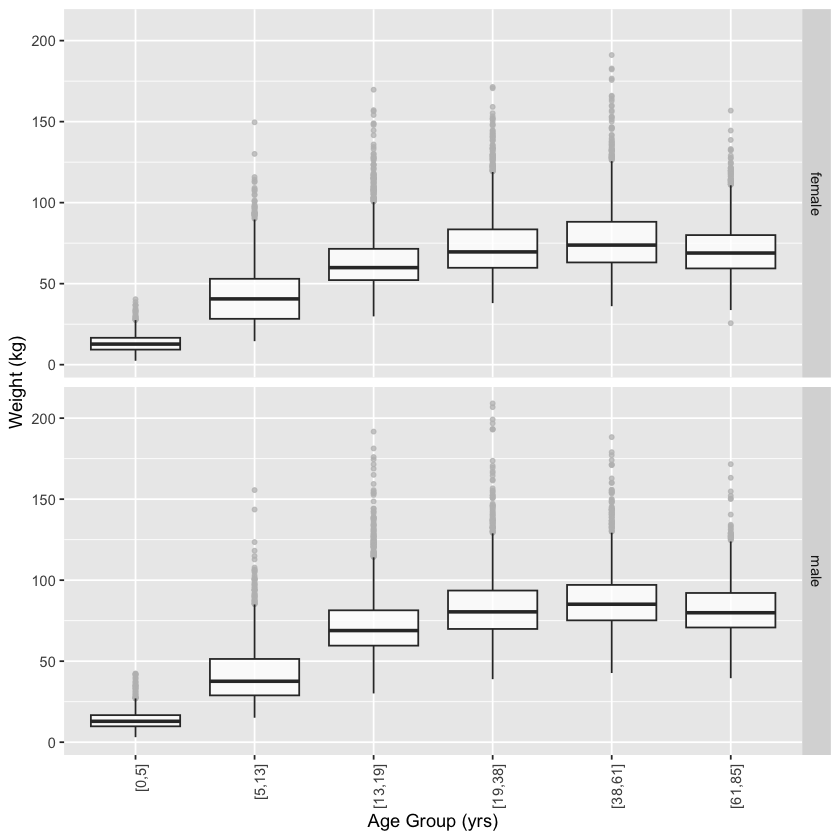

In [34]:
NCHS %>%
  mutate(ageGroup = mosaic::ntiles(x = age, n = 6, format = 'interval')) %>%
    ggplot(aes(y = weight, x = ageGroup)) +
      geom_boxplot(
        alpha         = 0.75,
        mapping       = aes(fill = diabetic),
        outlier.color = 'gray',
        outlier.size  = 1,
        position = position_dodge(width = 0.8)
      ) +
      facet_grid(sex ~ .) +
      xlab('Age Group (yrs)') +
      ylab('Weight (kg)') +
      theme(legend.position = 'top') +
      theme(axis.text.x = element_text(angle = 90, hjust = 1))

### 15.4 - Confidence intervals

Warning message:
“Removed 2575 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


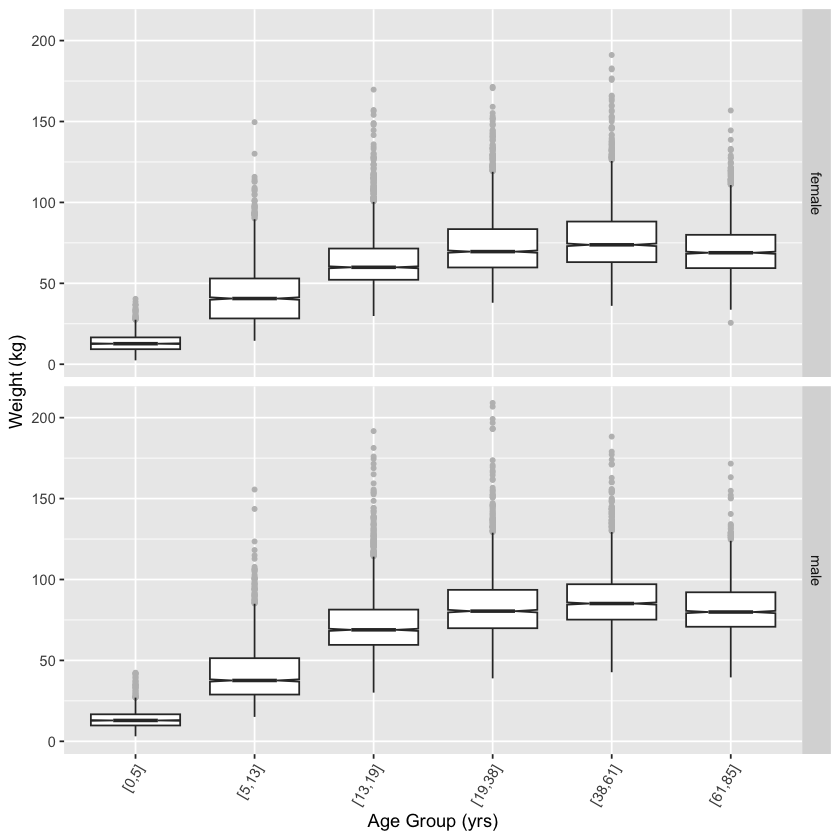

In [35]:
NCHS %>%
  mutate(ageGroup = mosaic::ntiles(x = age, n = 6, format = 'interval')) %>%
    ggplot(aes(y = weight, x = ageGroup)) +
      geom_boxplot(
        mapping       = aes(fill = diabetic),
        notch         = TRUE,
        outlier.color = 'gray',
        outlier.size  = 1,
        position      = position_dodge(width = 0.8)
      ) +
      facet_grid(sex ~ .) +
      xlab('Age Group (yrs)') +
      ylab('Weight (kg)') +
      theme(axis.text.x = element_text(angle = 60, hjust = 1))

### 15.5 - Model functions

In [36]:
head(NCHS)

sex    age pregnant ethnicity          death followup smoker diabetic height
1 female  2  no       Non-Hispanic Black NA    NA       no     0        0.916 
2 male   77  no       Non-Hispanic White alive 90       no     0        1.740 
3 female 10  no       Non-Hispanic White NA    NA       no     0        1.366 
4 male    1  no       Non-Hispanic Black NA    NA       no     0           NA 
5 male   49  no       Non-Hispanic White alive 74       yes    0        1.783 
6 female 19  no       Other/Multi        alive 86       no     0        1.620 
  weight ⋯ bmd    fmhm_other hdl chol bps bpd income pop_weight psu stratum
1 12.5   ⋯     NA       NA   NA   NA   NA NA  0.86    2970.804  1   5      
2 75.4   ⋯ 1.2196  0.12359   54  215   98 56  5.00   10224.133  3   1      
3 32.9   ⋯     NA       NA   30  129  108 63  1.47   14172.311  2   7      
4 13.3   ⋯     NA       NA   NA   NA   NA NA  0.57    3041.593  1   2      
5 92.5   ⋯ 1.0870  1.17688   42  279  122 83  5.00   30657.312  2   8      
6 59.2   ⋯ 0.8680 -1.22452   61  153  114 70  1.21   12224.876  2   2

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 3189 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“Removed 3189 rows containing missing values (`geom_point()`).”


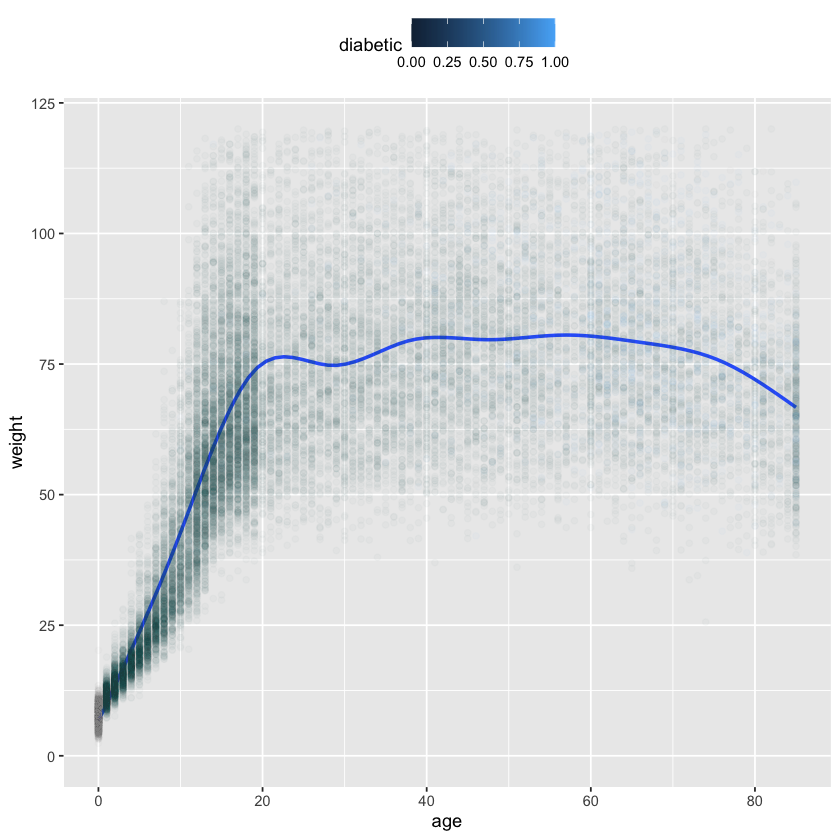

In [37]:
NCHS %>%
  ggplot(aes(x = age, y = weight, color = diabetic)) +
    stat_smooth(se = FALSE) +
    geom_point(alpha = 0.02) +
    ylim(0, 120) +
    theme(legend.position = 'top')

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 3189 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“Removed 3189 rows containing missing values (`geom_point()`).”


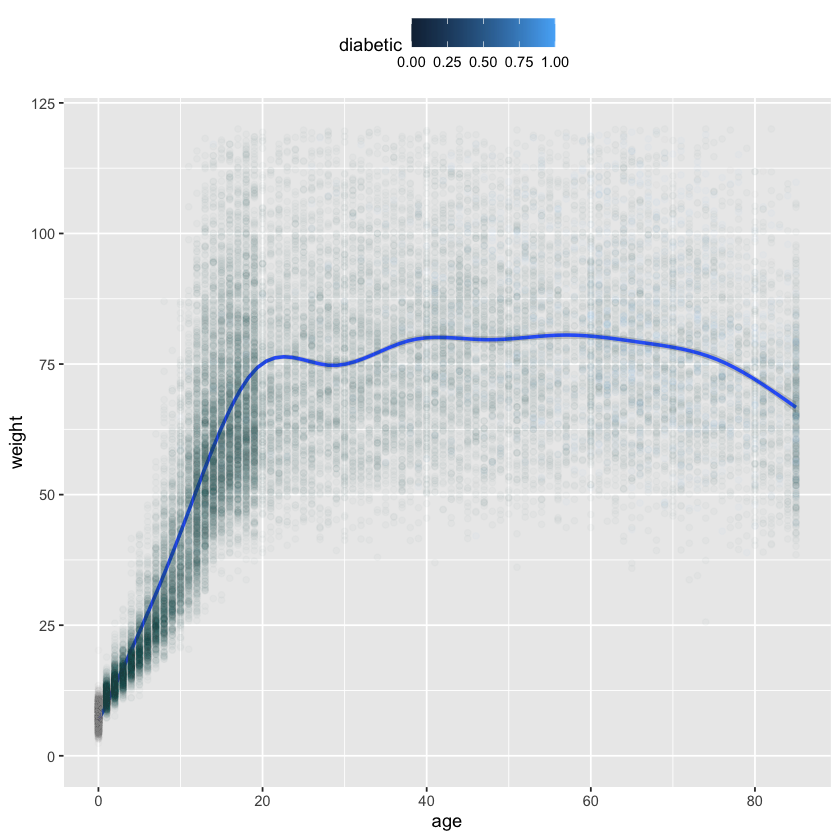

In [38]:
NCHS %>%
  ggplot(aes(x = age, y = weight, color = diabetic)) +
    stat_smooth() +
    geom_point(alpha = 0.02) +
    ylim(0, 120) +
    theme(legend.position = 'top')

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 3189 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 3189 rows containing missing values (`geom_point()`).”


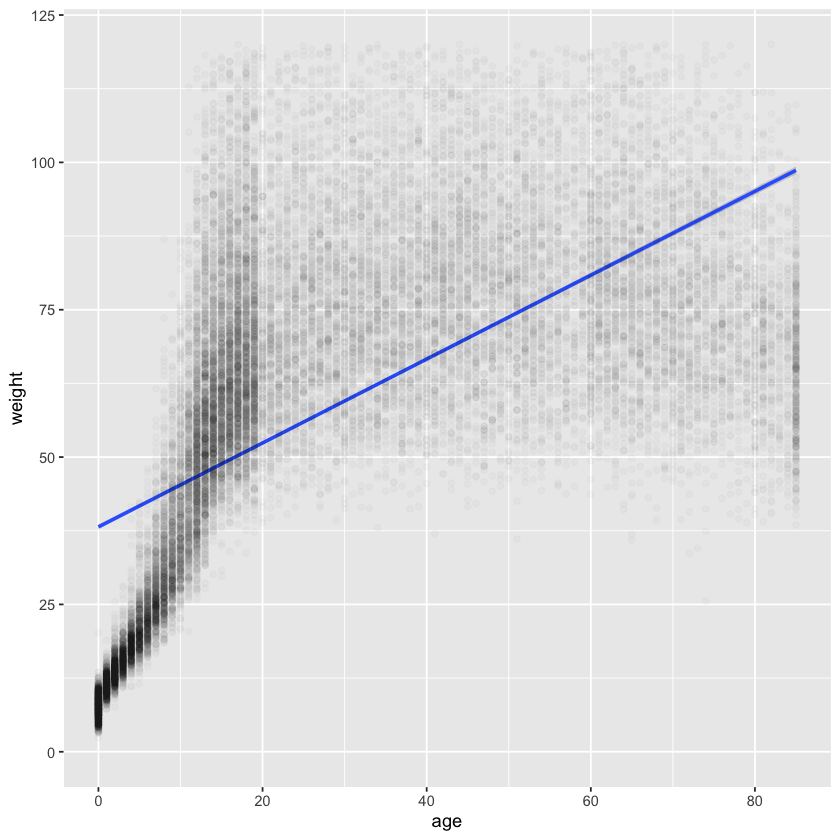

In [39]:
NCHS %>%
  ggplot(aes(x = age, y = weight),
    color = diabetic,
    fill  = diabetic
  ) +
  stat_smooth(method = lm) +
  geom_point(alpha = 0.02) +
  ylim(0, 120) +
  theme(legend.position = 'top')

---

## 16 - Data scraping and intake methods

[Data Scraping]

Data scraping is the gathering of data from sources such as web browsers in which they are not already in a tidy (data frame/table) format and the translation of such data to one or more data frames/tables.

[Data Cleaning]

Data clearning is the correcting of errors in data that stem either from blunders in data entry or from deficiencies in the way data is stored or coded.

Data frame-friendly formats
* CSV
  * `base::read.csv(stringsAsFactors = FALSE)`
  * `data.table::fread()`
  * `mosaic::read.file()`
  * `readr::read_csv()`
* technical software package
  * Octave/MATLAB
  * Stata
  * SPSS
  * Minitab
  * SAS
  * Epi
* relational databases
* Excel
* web
  * HTML `<table>`
  * JSON
  * XML
  * Google spreadsheet qua HTML
  * API

[List]

A list is an R object used to store a collection of other R objects. Elements of a list can even have different types; e.g., data frames, plots, model objects, even other lists.



* `as.numeric()`
* `as.character()`
* `readr::parse_number()`

In [40]:
webURL      <- 'https://mdbeckman.github.io/dcSupplement/data/houses-for-sale.csv'
myDataTable <- readr::read_csv(webURL)
myDataTable %>%
  select(price, bedrooms, bathrooms, fuel, air_cond, construction) %>%
  head()

Rows: 1728 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (16): price, lot_size, waterfront, age, land_value, construction, air_co...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


price  bedrooms bathrooms fuel air_cond construction
1 132500 2        1.0       3    0        0           
2 181115 3        2.5       2    0        0           
3 109000 4        1.0       2    0        0           
4 155000 3        1.5       2    0        0           
5  86060 2        1.0       2    1        1           
6 120000 4        1.0       2    0        0

```r
# RStudio
file_name <- file.choose() # then navigate and click on your file
MyDataTable2 <-
  data.table::fread(
    input  = file_name,
    nrows  = 0,
    select = c(1, 4, 5, 10),
    drop   = c(2, 3, 6)
  ) %>%
  as.data.frame()
```

In [41]:
web_page <- 'https://en.wikipedia.org/wiki/Mile_run_world_record_progression'

SetOfTables <-
  web_page %>%
    read_html() %>%
    html_nodes(css = 'table') %>%
    html_table(fill = TRUE)

length(SetOfTables)

Table3 <- SetOfTables[[3]]
Table3
Table4 <- SetOfTables[[4]]
Table4

[1] 12

Time Athlete             Nationality    Date             Venue    
1 4:52 Cadet Marshall      United Kingdom 2 September 1852 Addiscome
2 4:45 Thomas Finch        United Kingdom 3 November 1858  Oxford   
3 4:45 St. Vincent Hammick United Kingdom 15 November 1858 Oxford   
4 4:40 Gerald Surman       United Kingdom 24 November 1859 Oxford   
5 4:33 George Farran       United Kingdom 23 May 1862      Dublin

Time    Auto    Athlete            Nationality    Date               
1  4:14.4          John Paul Jones    United States  31 May 1913[6]     
2  4:12.6          Norman Taber       United States  16 July 1915[6]    
3  4:10.4          Paavo Nurmi        Finland        23 August 1923[6]  
4  4:09.2          Jules Ladoumègue   France         4 October 1931[6]  
5  4:07.6          Jack Lovelock      New Zealand    15 July 1933[6]    
6  4:06.8          Glenn Cunningham   United States  16 June 1934[6]    
7  4:06.4          Sydney Wooderson   United Kingdom 28 August 1937[6]  
8  4:06.2          Gunder Hägg        Sweden         1 July 1942[6]     
9  4:06.2          Arne Andersson     Sweden         10 July 1942[6]    
10 4:04.6          Gunder Hägg        Sweden         4 September 1942[6]
11 4:02.6          Arne Andersson     Sweden         1 July 1943[6]     
12 4:01.6          Arne Andersson     Sweden         18 July 1944[6]    
13 4:01.4          Gunder Hägg        Sweden         17 July 1945[6]    
14 3:59.4          Roger Bannister    United Kingdom 6 May 1954[6]      
15 3:58.0          John Landy         Australia      21 June 1954[6]    
16 3:57.2          Derek Ibbotson     United Kingdom 19 July 1957[6]    
17 3:54.5          Herb Elliott       Australia      6 August 1958[6]   
18 3:54.4          Peter Snell        New Zealand    27 January 1962[6] 
19 3:54.1  3:54.04 Peter Snell        New Zealand    17 November 1964[6]
20 3:53.6          Michel Jazy        France         9 June 1965[6]     
21 3:51.3          Jim Ryun           United States  17 July 1966[6]    
22 3:51.1          Jim Ryun           United States  23 June 1967[6]    
23 3:51.0          Filbert Bayi       Tanzania       17 May 1975[6]     
24 3:49.4          John Walker        New Zealand    12 August 1975[6]  
25 3:49.0  3:48.95 Sebastian Coe      United Kingdom 17 July 1979[6]    
26 3:48.8          Steve Ovett        United Kingdom 1 July 1980[6]     
27 3:48.53         Sebastian Coe      United Kingdom 19 August 1981[6]  
28 3:48.40         Steve Ovett        United Kingdom 26 August 1981[6]  
29 3:47.33         Sebastian Coe      United Kingdom 28 August 1981[6]  
30 3:46.32         Steve Cram         United Kingdom 27 July 1985[6]    
31 3:44.39         Noureddine Morceli Algeria        5 September 1993[6]
32 3:43.13         Hicham El Guerrouj Morocco        7 July 1999[6]     
   Venue            
1  Allston, Mass.   
2  Allston, Mass.   
3  Stockholm        
4  Paris            
5  Princeton, N.J.  
6  Princeton, N.J.  
7  Motspur Park     
8  Gothenburg       
9  Stockholm        
10 Stockholm        
11 Gothenburg       
12 Malmö            
13 Malmö            
14 Oxford           
15 Turku            
16 London           
17 Dublin           
18 Wanganui         
19 Auckland         
20 Rennes           
21 Berkeley, Cal.   
22 Bakersfield, Cal.
23 Kingston         
24 Gothenburg       
25 Oslo             
26 Oslo             
27 Zürich           
28 Koblenz          
29 Brussels         
30 Oslo             
31 Rieti            
32 Rome

In [42]:
# Four of the variables from the `houses-for-sale.csv` file giving features of the Saratoga, NY houses stored as integer codes; each case is a different house.
Houses <-
  read_csv('https://mdbeckman.github.io/dcSupplement/data/houses-for-sale.csv')
Houses %>%
  select(fuel, heat, sewer, construction) %>%
  head()

Rows: 1728 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (16): price, lot_size, waterfront, age, land_value, construction, air_co...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fuel heat sewer construction
1 3    4    2     0           
2 2    3    2     0           
3 2    3    3     0           
4 2    2    2     0           
5 2    2    3     1           
6 2    2    2     0

In [43]:
# Codes for the house system types.
#   describes the codes in a format that makes it easy to add new code values as the need arises
Translations <-
  read_csv('https://mdbeckman.github.io/dcSupplement/data/house_codes.csv')
Translations %>%
  head()

Rows: 13 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): system_type, meaning
dbl (1): code

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


code system_type meaning
1 0    new_const   no     
2 1    new_const   yes    
3 1    sewer_type  none   
4 2    sewer_type  private
5 3    sewer_type  public 
6 0    central_air no

In [44]:
# There is a column for each system type that translates the integer code to a meaningful term.
# In cases where the integer has no corresponding term, `invalid` has been entered; this provides a quick way to distinguish between incorrect entries and missing entries.
CodeVals <-
  Translations %>%
    spread(key = system_type, value = meaning, fill = 'invalid')
CodeVals %>%
  head()

code central_air fuel_type heat_type new_const sewer_type
1 0    no          invalid   invalid   no        invalid   
2 1    yes         invalid   invalid   yes       none      
3 2    invalid     gas       hot air   invalid   private   
4 3    invalid     electric  hot water invalid   public    
5 4    invalid     oil       electric  invalid   invalid

In [45]:
# To carry out the translation, join each variable, one at a time, to the data frame of interest.
# Note how the `by` value changes for each variable.
Houses <-
  Houses %>%
    left_join(CodeVals %>% select(code, fuel_type),  by = c(fuel  = 'code')) %>%
    left_join(CodeVals %>% select(code, heat_type),  by = c(heat  = 'code')) %>%
    left_join(CodeVals %>% select(code, sewer_type), by = c(sewer = 'code'))
Houses %>% head()

price  lot_size waterfront age land_value construction air_cond fuel heat
1 132500 0.09     0           42 50000      0            0        3    4   
2 181115 0.92     0            0 22300      0            0        2    3   
3 109000 0.19     0          133  7300      0            0        2    3   
4 155000 0.41     0           13 18700      0            0        2    2   
5  86060 0.11     0            0 15000      1            1        2    2   
6 120000 0.68     0           31 14000      0            0        2    2   
  sewer living_area pct_college bedrooms fireplaces bathrooms rooms fuel_type
1 2      906        35          2        1          1.0       5     electric 
2 2     1953        51          3        0          2.5       6     gas      
3 3     1944        51          4        1          1.0       8     gas      
4 2     1944        51          3        1          1.5       5     gas      
5 3      840        51          2        0          1.0       3     gas      
6 2     1152        22          4        1          1.0       8     gas      
  heat_type sewer_type
1 electric  private   
2 hot water private   
3 hot water public    
4 hot air   private   
5 hot air   public    
6 hot air   private

bogus Timestamp          Year Day Month CaptureTime SpeciesName   Sex
3 .     4/14/2010 13:20:56 1972 16   7    7:00:00     Song Sparrow  U  
4 .                          NA NA  NA                                 
5 .     5/13/2010 16:00:30 1972 16   7    7:00:00     Song Sparrow  U  
6 .     5/13/2010 16:02:15 1972 16   7    7:00:00     Field Sparrow U  
7 .     5/13/2010 16:03:18 1972 16   7    7:00:00     Field Sparrow U  
8 .     5/13/2010 16:04:23 1972 16   7    7:00:00     Song Sparrow  U  
  Age                    BandNumber ⋯ Condition Release Comments
3 AHY (After Hatch Year) 107-151187 ⋯ none      none    none    
4                                   ⋯                           
5 AHY (After Hatch Year) 107-151187 ⋯ none      none    none    
6 AHY (After Hatch Year) 1260-74572 ⋯ none      none    none    
7 AHY (After Hatch Year) 1260-74541 ⋯ none      none    none    
8 AHY (After Hatch Year) 107-151188 ⋯ none      none    none    
  DataEntryPerson Weight WingChord Temperature RecaptureOriginal
3 Jerald Dosch                                                  
4 Caitlin Baker                                                 
5 Caitlin Baker                                                 
6 Caitlin Baker                                                 
7 Caitlin Baker                                                 
8 Caitlin Baker                                                 
  RecapturePrevious TailLength
3                             
4                             
5                             
6                             
7                             
8

Who           When               
3 Jerald Dosch  2010-04-14 13:20:56
4 Caitlin Baker <NA>               
5 Caitlin Baker 2010-05-13 16:00:30
6 Caitlin Baker 2010-05-13 16:02:15
7 Caitlin Baker 2010-05-13 16:03:18
8 Caitlin Baker 2010-05-13 16:04:23

Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”
Warning message:
“There were 2 warnings in `summarize()`.
The first warning was:
ℹ In argument: `start = min(When, na.rm = TRUE)`.
ℹ In group 1: `Who = ""`.
Caused by warning in `min.default()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


Who                start               finish             
1                    Inf                 -Inf               
2 Abby Colehour      2011-04-23 15:50:24 2011-04-23 15:50:24
3 Brennan Panzarella 2010-09-13 10:48:12 2011-04-10 21:58:56
4 Caitlin Baker      2010-05-13 16:00:30 2010-05-28 19:41:52
5 Emily Merrill      2010-06-08 09:10:01 2010-06-08 14:47:21
6 Jerald Dosch       2010-04-14 13:20:56 2010-04-14 13:20:56

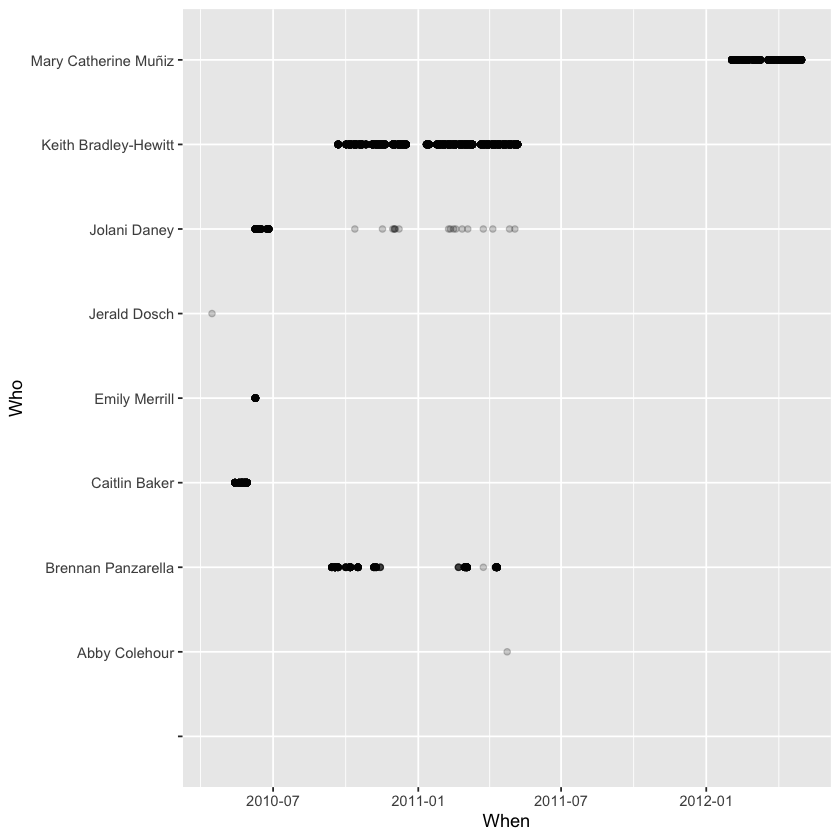

In [46]:
OrdwayBirds <-
  OrdwayBirds %>%
    mutate(
      Month = as.numeric(Month),
      Year  = as.numeric(Year),
      Day   = as.numeric(Day)
    )
head(OrdwayBirds)

WhenAndWho <-
  OrdwayBirds %>%
    select(Who = DataEntryPerson, When = Timestamp) %>%
    mutate(When = lubridate::mdy_hms(When))
head(WhenAndWho)

WhenAndWho %>%
  ggplot(aes(x = When, y = Who)) +
    geom_point(alpha = 0.2)

WhenAndWho %>%
  group_by(Who) %>%
  summarize(start  = min(When, na.rm = TRUE),
            finish = max(When, na.rm = TRUE)) %>%
  head()

### Exercises

#### [16.6.1]

Here are some character strings containing times or dates written in different formats. Your task it twofold: (A) for each, choose an appropriate function from the `lubridate` package to translate the character string into a datetime object in R and then (B) use R to calculate the number of days between that date and your birthday.

```r
'April 30, 1777'              # Johann Carl Friedrich Gauss
'06-23-1912'                  # Alan Turing
'3 March 1847'                # Alexander Graham Bell
'Nov. 11th, 1918 at 11:00 am' # the armistice ending WWI on the western front
'July 20, 1969'               # the first manned moon landing
```

In [47]:
lubridate::mdy('April 30, 1777')
lubridate::mdy('06-23-1912')
lubridate::dmy('3 March 1847')
lubridate::mdy_hm('Nov. 11th, 1918 at 11:00 am')
lubridate::mdy('July 20, 1969')

birthday <- lubridate::mdy('February 4, 1992')
birthday

[1] "1777-04-30"

[1] "1912-06-23"

[1] "1847-03-03"

[1] "1918-11-11 11:00:00 UTC"

[1] "1969-07-20"

[1] "1992-02-04"

In [48]:
birthday - lubridate::mdy('April 30, 1777')
birthday - lubridate::mdy('06-23-1912')
birthday - lubridate::dmy('3 March 1847')
birthday - lubridate::as_date(lubridate::mdy_hm('Nov. 11th, 1918 at 11:00 am'))
birthday - lubridate::mdy('July 20, 1969')

Time difference of 78441 days

Time difference of 29080 days

Time difference of 52933 days

Time difference of 26748 days

Time difference of 8234 days

#### [16.6.2]

Here are some strings containing numerical amounts. For each one, say whether `as.numeric()` or `readr::parse_number()` (or both or neither) properly converts the given string to a numeric value.

```r
'42,659.30'
'17%'
'Nineteen'
'£100'
'9.8 m/seconds-square'
'6.62606957 x 10^-34 m2 kg / s'
'6.62606957e-34'
'42.659,30' # a European style
```

In [49]:
as.numeric('42,659.30')                     # incorrect
as.numeric('17%')                           # incorrect
as.numeric('Nineteen')                      # incorrect
as.numeric('£100')                          # incorrect
as.numeric('9.8 m/seconds-square')          # incorrect
as.numeric('6.62606957 x 10^-34 m2 kg / s') # incorrect
as.numeric('6.62606957e-34')                #   correct
as.numeric('42.659,30')                     # incorrect

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] NA

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] NA

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] NA

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] NA

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] NA

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] NA

[1] 6.62607e-34

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


[1] NA

In [50]:
readr::parse_number('42,659.30')                     #   correct
readr::parse_number('17%')                           #   correct
readr::parse_number('Nineteen')                      # incorrect
readr::parse_number('£100')                          #   correct
readr::parse_number('9.8 m/seconds-square')          #   correct
readr::parse_number('6.62606957 x 10^-34 m2 kg / s') # incorrect
readr::parse_number('6.62606957e-34')                #   correct
readr::parse_number('42.659,30')                     # incorrect

[1] 42659.3

[1] 17

Warning message:
“1 parsing failure.
row col expected   actual
  1  -- a number Nineteen
”


[1] NA
attr(,"problems")
# A tibble: 1 × 4
    row   col expected actual  
  <int> <int> <chr>    <chr>   
1     1    NA a number Nineteen

[1] 100

[1] 9.8

[1] 6.62607

[1] 6.62607e-34

[1] 42.6593

#### [16.6.3]

Grab Table 4 (or another similar table) from the Wikipedia page on world records in the mile (or some similar event). Make a plot of the record time versus the date in which it occurred. Also, mark each point with the name of the athlete written above the point. (Hint: Use `geom_text()`.) To convert time entries such as `'4:20.5'` into seconds, use the `lubridate` package's `as.duration(ms('40:20.5'))`. You can get rid of the footnote markers such as `[5]` in the dates using the `gsub()` transformation function which replaces the characters identified in the first argument with those in the second argument. The string `'\\[.\\]$'` is an example of a regular expression which identifies a pattern of characters, in this case a single character in square brackets just before the end of the string.

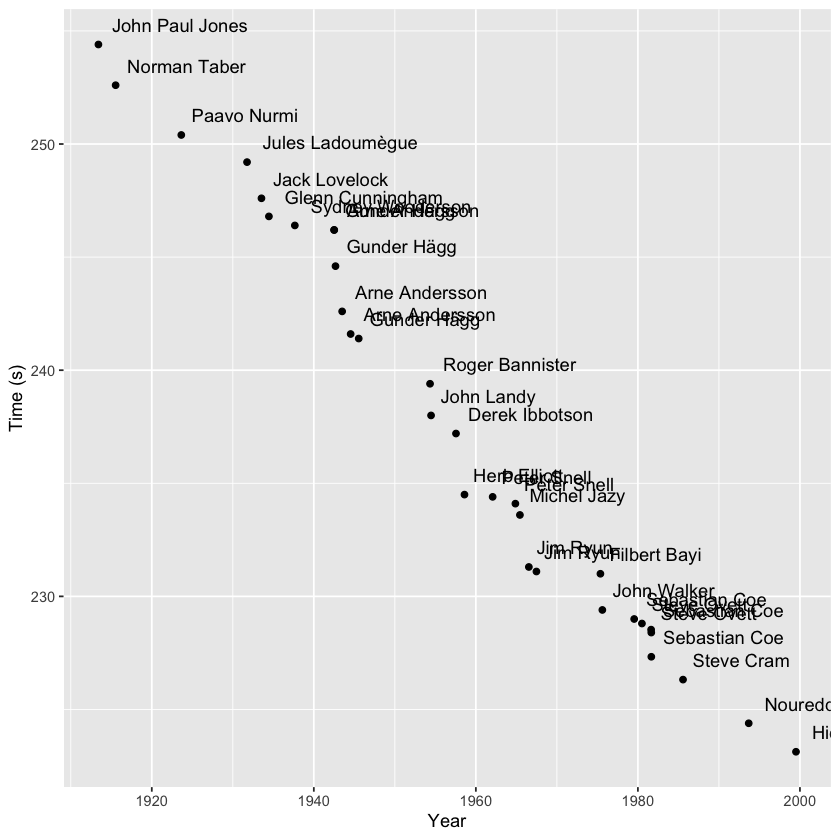

In [51]:
Table4 %>%
  mutate(
    Date = lubridate::dmy(gsub('\\[.\\]$', '', Date)),
    Time = lubridate::as.duration(lubridate::ms(Time))
  ) %>%
  ggplot(aes(x = Date, y = Time)) +
    geom_point() +
    geom_text(aes(label = Athlete, hjust = -0.1, vjust = -1)) +
    labs(x = 'Year', y = 'Time (s)')

---

## Project: Popular Names
[Project: Popular Names](https://dtkaplan.github.io/DataComputingEbook/project-popular-names.html#project-popular-names) from Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

---

In [52]:
?dcData::BabyNames

BabyNames                package:dcData                R Documentation

_N_a_m_e_s _o_f _c_h_i_l_d_r_e_n _a_s _r_e_c_o_r_d_e_d _b_y _t_h_e _U_S _S_o_c_i_a_l _S_e_c_u_r_i_t_y _A_d_m_i_n_i_s_t_r_a_t_i_o_n.

_D_e_s_c_r_i_p_t_i_o_n:

     The US Social Security Administration provides yearly lists of
     names given to babies. These data combine the yearly lists.

     `BabyNames` is the raw data from the SSA. The case is a
     year-name-sex, for example: Jane F 1922. The count is the number
     of children of that sex given that name in that year. Names
     assigned to fewer than five children of one sex in any year are
     not listed, presumably out of privacy concerns.

_U_s_a_g_e:

     data("BabyNames")
     
_F_o_r_m_a_t:

     A data frame with 1,792,091 entries on four variables:

     name The given name (character string)

     sex F or M (character string)

     count The number of babies give

In [53]:
head(x = dcData::BabyNames)

name      sex count year
1 Mary      F   7065  1880
2 Anna      F   2604  1880
3 Emma      F   2003  1880
4 Elizabeth F   1939  1880
5 Minnie    F   1746  1880
6 Margaret  F   1578  1880

In [54]:
count(x = dcData::BabyNames, sex)

sex n      
1 F   1062432
2 M    729659

In [55]:
count(x = dcData::BabyNames, year) %>%
  arrange(desc(n)) %>%
    head(n = 10)

year n    
1  2008 35038
2  2007 34925
3  2009 34668
4  2006 34066
5  2010 34027
6  2011 33858
7  2012 33658
8  2013 33072
9  2005 32527
10 2004 32033

In [56]:
select(.data = dcData::BabyNames, name, count) %>%
  arrange(desc(count)) %>%
    head(n = 10)

name    count
1  Linda   99674
2  Linda   96210
3  James   94758
4  Michael 92711
5  Robert  91652
6  Linda   90994
7  Michael 90629
8  Michael 90512
9  James   88610
10 Michael 88481

In [57]:
select(.data = dcData::BabyNames, name, count) %>%
  arrange(desc(count)) %>%
    filter(count == 5)

name       count
1      Adelle     5    
2      Adina      5    
3      Adrienne   5    
4      Albertine  5    
5      Alys       5    
6      Ana        5    
7      Araminta   5    
8      Arthur     5    
9      Birtha     5    
10     Bulah      5    
11     Caddie     5    
12     Celie      5    
13     Charlotta  5    
14     Clair      5    
15     Concepcion 5    
16     Cordella   5    
17     Corrine    5    
18     Delila     5    
19     Delphine   5    
20     Dosha      5    
21     Edgar      5    
22     Elaine     5    
23     Elisa      5    
24     Ellar      5    
25     Elmire     5    
26     Elvina     5    
27     Ena        5    
28     Estie      5    
29     Etter      5    
30     Fronnie    5    
⋮      ⋮          ⋮    
249880 Zayceon    5    
249881 Zayid      5    
249882 Zaylynn    5    
249883 Zecheriah  5    
249884 Zedric     5    
249885 Zefram     5    
249886 Zekhi      5    
249887 Zenith     5    
249888 Zennon     5    
249889 Zepplin    5    
249890 Zevon      5    
249891 Zhaiden    5    
249892 Zhen       5    
249893 Zhian      5    
249894 Zien       5    
249895 Zierre     5    
249896 Zimri      5    
249897 Ziquan     5    
249898 Ziyaad     5    
249899 Ziyang     5    
249900 Zmari      5    
249901 Zolan      5    
249902 Zurich     5    
249903 Zyeer      5    
249904 Zyere      5    
249905 Zyhier     5    
249906 Zylar      5    
249907 Zymari     5    
249908 Zymeer     5    
249909 Zyree      5

name     sex count year
1 Franklin M   120   1880
2 Abraham  M    81   1880
3 Franklin M   117   1881
4 Abraham  M    86   1881
5 Franklin M   112   1882
6 Abraham  M    91   1882

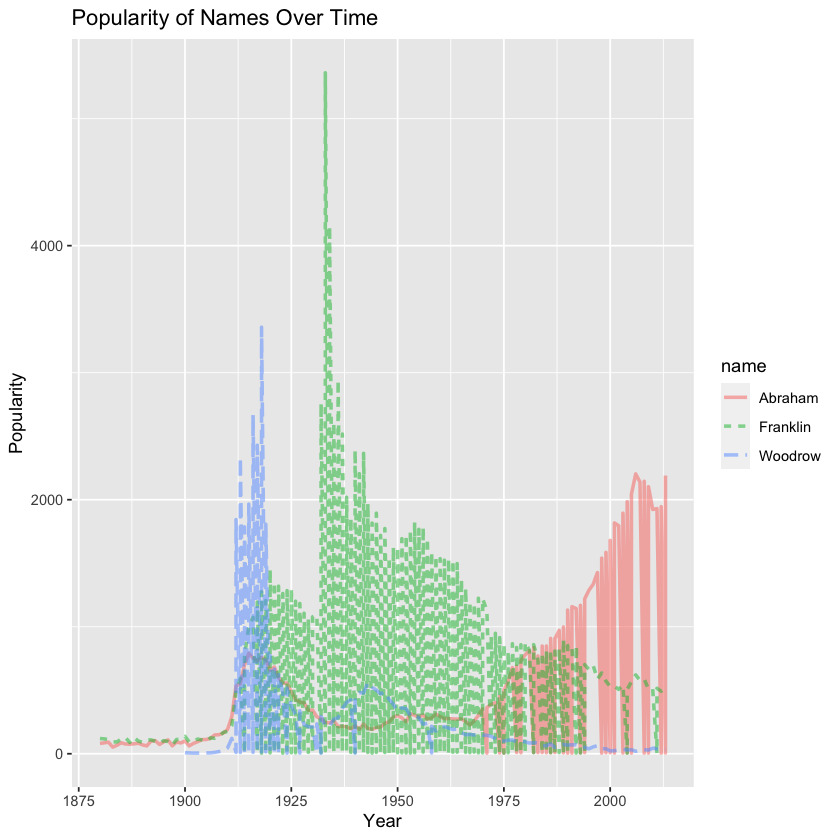

In [58]:
nonGlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Abraham', 'Franklin', 'Woodrow'))
head(x = nonGlyphReadyForm)

nonGlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = count,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year name     total
1 1880 Abraham   81  
2 1880 Franklin 120  
3 1881 Abraham   86  
4 1881 Franklin 117  
5 1882 Abraham   91  
6 1882 Franklin 112

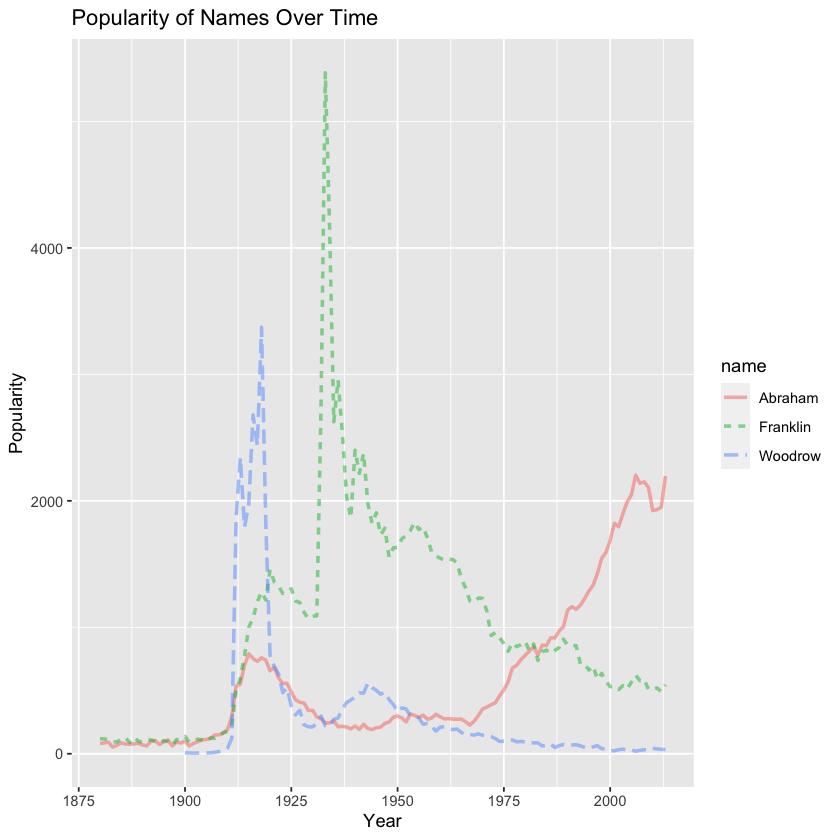

In [59]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Abraham', 'Franklin', 'Woodrow')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

---

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year name  total
1 1880 Dave  131  
2 1880 David 869  
3 1881 Dave  135  
4 1881 David 750  
5 1882 Dave  144  
6 1882 David 838

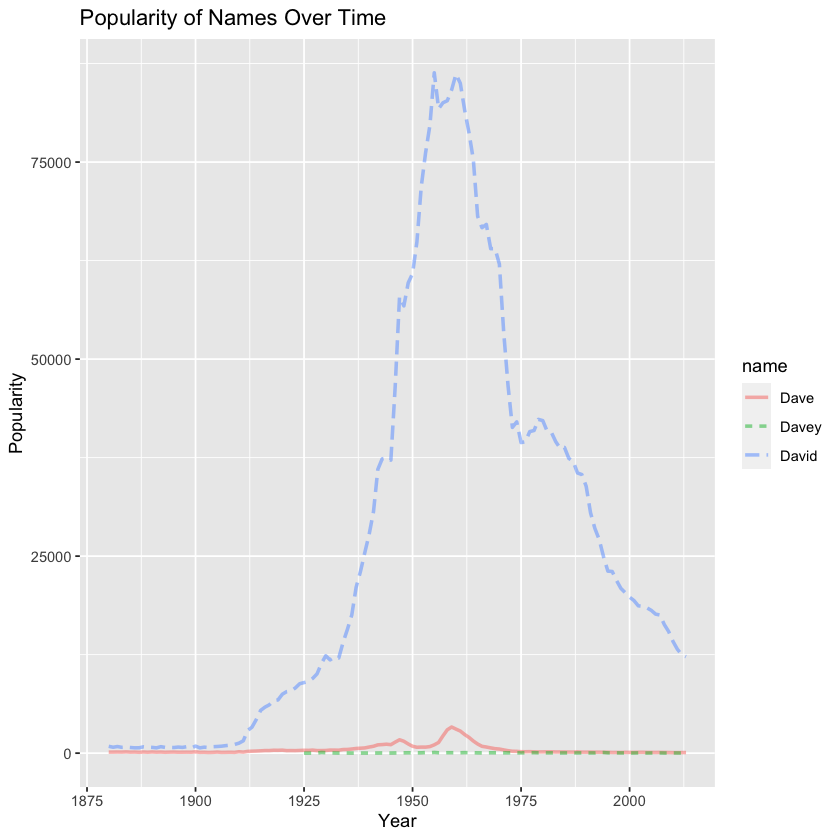

In [60]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Dave', 'Davey', 'David')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

In [61]:
dcData::BabyNames %>%
  filter(name %in% c('Davey'))

name  sex count year
1  Davey M    5    1925
2  Davey M    9    1928
3  Davey M   89    1929
4  Davey F    5    1930
5  Davey M   54    1930
6  Davey M   45    1931
7  Davey M   26    1932
8  Davey M   15    1933
9  Davey M   22    1934
10 Davey M   17    1935
11 Davey M    9    1936
12 Davey M   15    1937
13 Davey M   14    1938
14 Davey M   16    1939
15 Davey M    8    1940
16 Davey M   17    1941
17 Davey M   18    1942
18 Davey F    5    1943
19 Davey M   19    1943
20 Davey M   10    1944
21 Davey M   15    1945
22 Davey M   25    1946
23 Davey M   37    1947
24 Davey M   42    1948
25 Davey M   50    1949
26 Davey M   41    1950
27 Davey M   39    1951
28 Davey M   44    1952
29 Davey M   74    1953
30 Davey M   55    1954
⋮  ⋮     ⋮   ⋮     ⋮   
65 Davey M   29    1988
66 Davey M   33    1989
67 Davey M   20    1990
68 Davey M   26    1991
69 Davey M   26    1992
70 Davey M   72    1993
71 Davey F    5    1994
72 Davey M   75    1994
73 Davey M   34    1995
74 Davey M   31    1996
75 Davey M   34    1997
76 Davey M   25    1998
77 Davey M   28    1999
78 Davey F    6    2000
79 Davey M   14    2000
80 Davey M   20    2001
81 Davey M   29    2002
82 Davey M   14    2003
83 Davey M   14    2004
84 Davey M   22    2005
85 Davey F    5    2006
86 Davey M   18    2006
87 Davey M   25    2007
88 Davey M   14    2008
89 Davey M   14    2009
90 Davey M   26    2010
91 Davey M   19    2011
92 Davey M   17    2012
93 Davey F    7    2013
94 Davey M   18    2013

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year name  total
1 1925 Davey  5   
2 1928 Davey  9   
3 1929 Davey 89   
4 1930 Davey 59   
5 1931 Davey 45   
6 1932 Davey 26

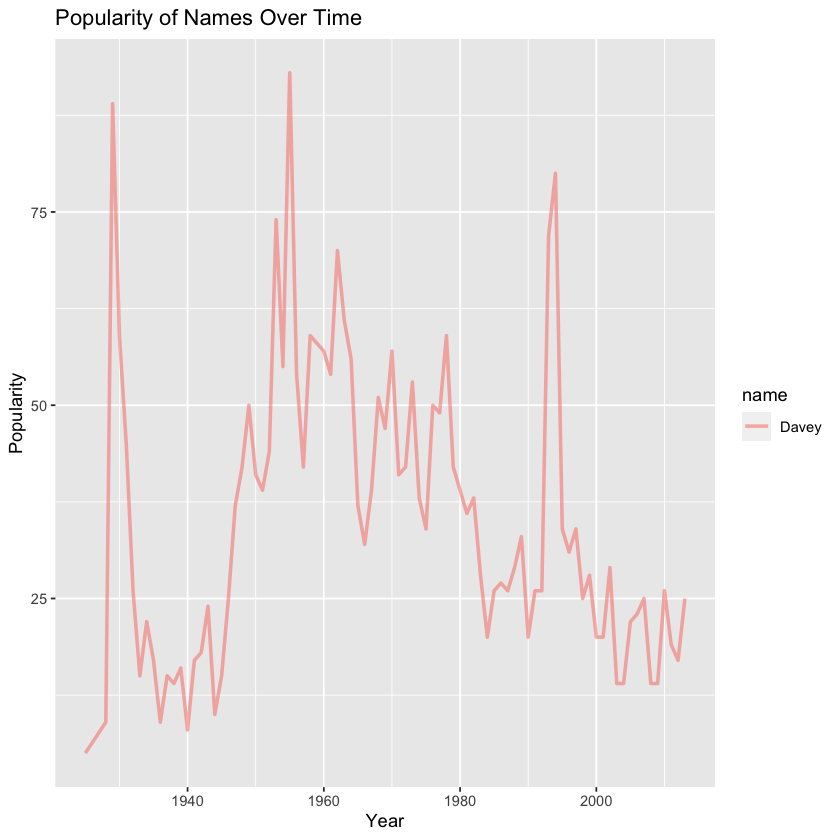

In [62]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Davey')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year name     total
1 1880 Carol      7  
2 1880 Caroline 306  
3 1880 Carolyn   80  
4 1880 Carrie   957  
5 1881 Carol     11  
6 1881 Caroline 316

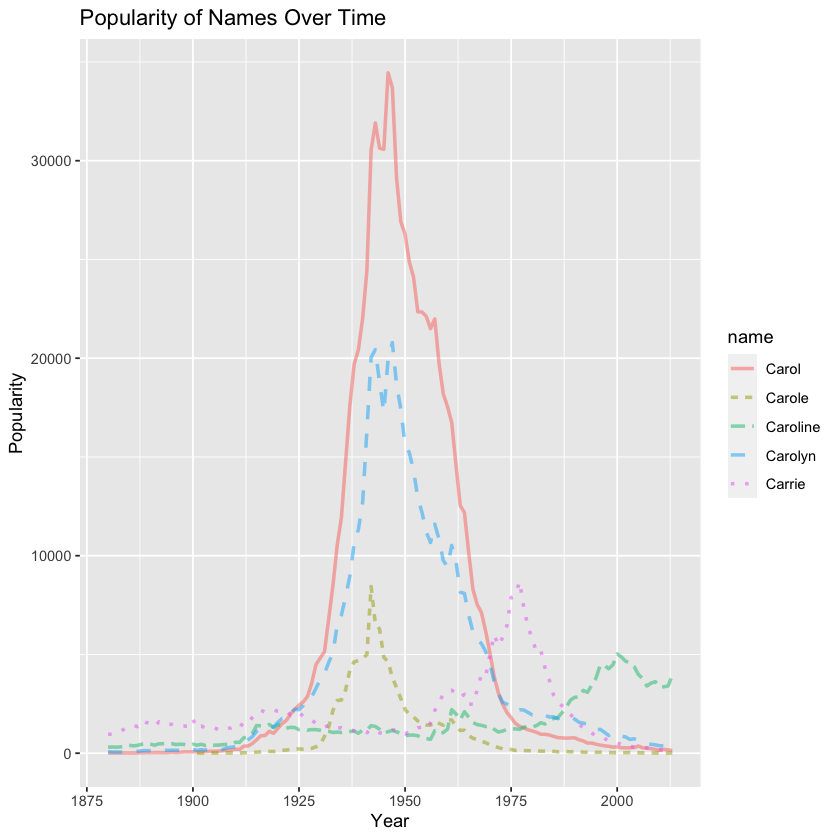

In [63]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Carol', 'Carole', 'Caroline', 'Carolyn', 'Carrie')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year name total
1 1880 Jeff 66   
2 1881 Jeff 61   
3 1882 Jeff 81   
4 1883 Jeff 44   
5 1884 Jeff 74   
6 1885 Jeff 63

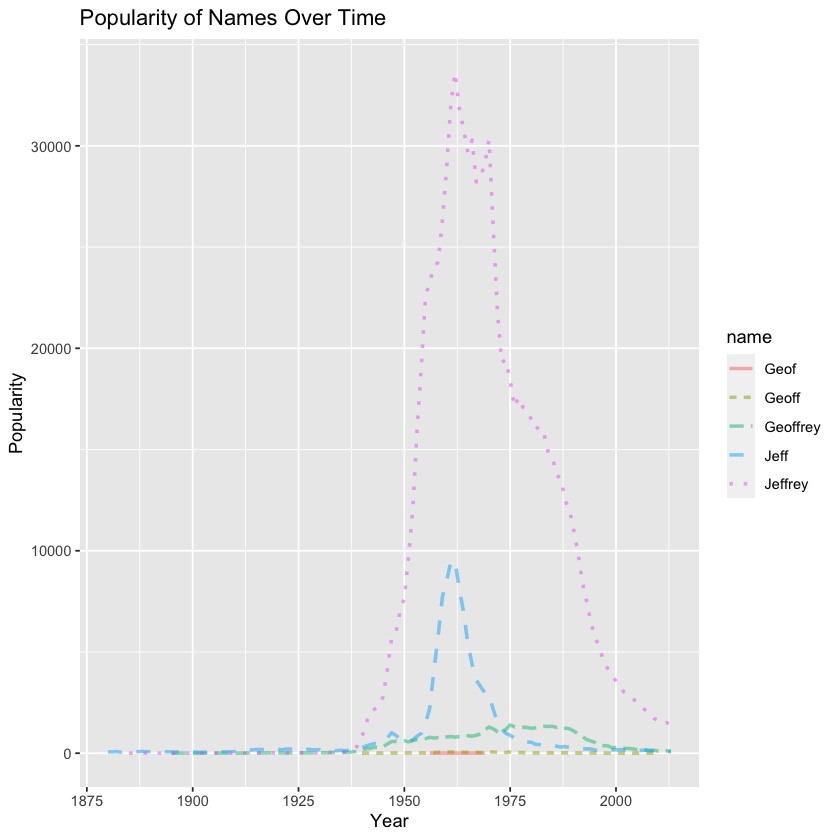

In [64]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Jeff', 'Jeffrey', 'Geof', 'Geoff', 'Geoffrey')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year name  total
1 1940 Geoff 5    
2 1942 Geoff 7    
3 1943 Geoff 5    
4 1944 Geoff 8    
5 1945 Geoff 8    
6 1946 Geoff 7

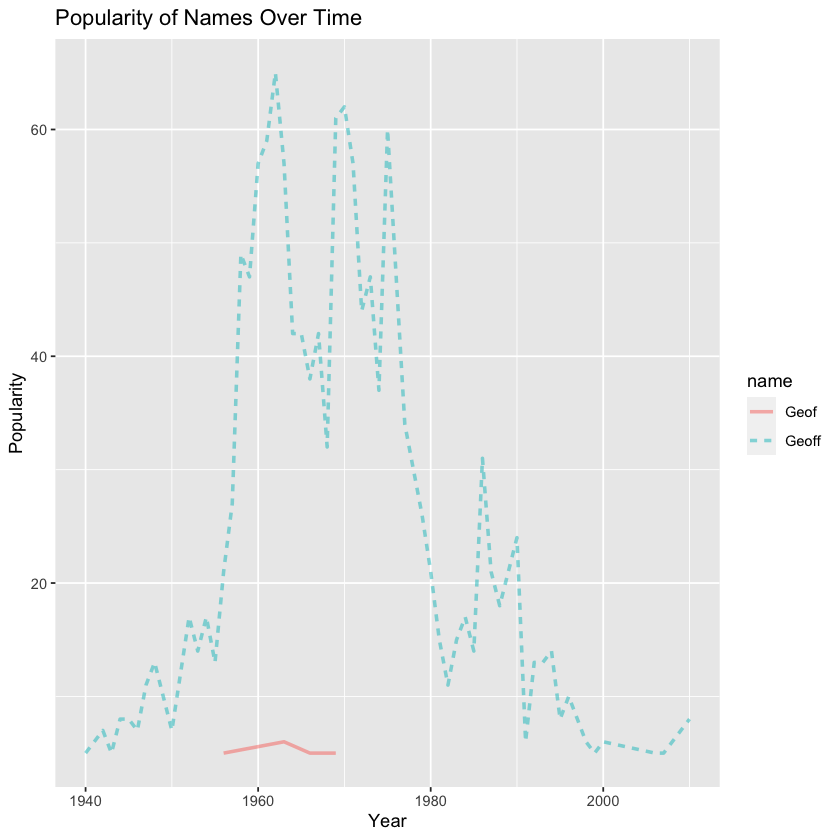

In [65]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c('Geof', 'Geoff')) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year name      total
1 1880 Elisa        5 
2 1880 Elise       24 
3 1880 Eliza      258 
4 1880 Elizabeth 1948 
5 1880 Ellie       17 
6 1880 Elsa        20

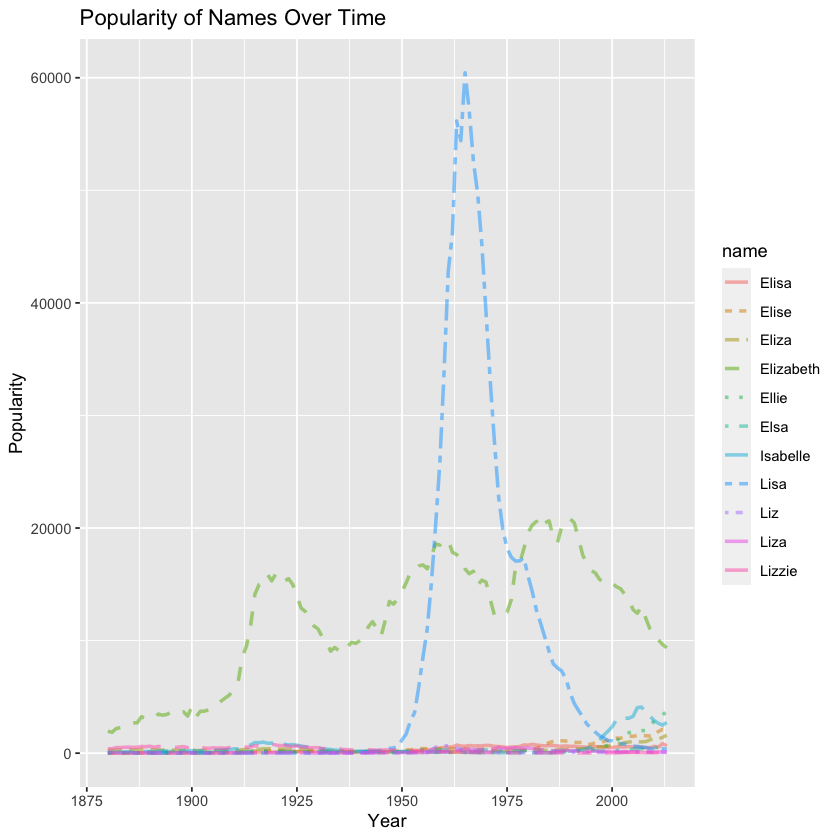

In [66]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c(
    'Elizabeth',
    'Elisa',
    'Elise',
    'Eliza',
    'Ellie',
    'Elsa',
    'Isabelle',
    'Lisa',
    'Liz',
    'Liza',
    'Lizzie'
    )) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year name   total
1 1880 Bessie  796 
2 1880 Betty   117 
3 1881 Bessie  911 
4 1881 Betty   112 
5 1882 Bessie 1153 
6 1882 Betty   123

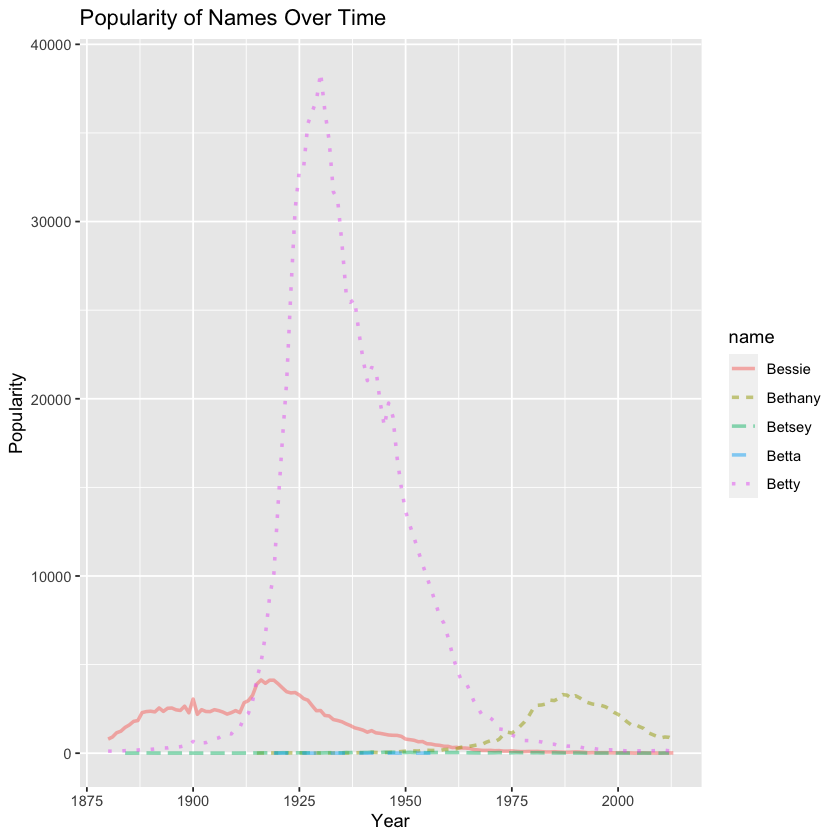

In [67]:
GlyphReadyForm <- dcData::BabyNames %>%
  filter(name %in% c(
    'Bethany',
    'Bessie',
    'Betsey',
    'Betta',
    'Betty'
    )) %>%
    group_by(year, name) %>%
      summarize(total = sum(count))
head(x = GlyphReadyForm)

GlyphReadyForm %>%
  ggplot() +
    geom_line(
      alpha     = 0.5,
      linewidth = 1,
      mapping   = aes(x        = year,
                      y        = total,
                      color    = name,
                      linetype = name),
      position  = 'identity',
      stat      = 'identity',
      show.legend=TRUE
    ) +
    xlab('Year') +
    ylab('Popularity') +
    ggtitle('Popularity of Names Over Time')

---

## Project: Bicycle Sharing
[Project: Bicycle Sharing](https://dtkaplan.github.io/DataComputingEbook/project-bicycle-sharing.html#project-bicycle-sharing) from Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

---

In [68]:
# information about the location of each of the stations in the system
station_url <- 'https://mdbeckman.github.io/dcSupplement/data/DC-Stations.csv'
Stations    <- readr::read_csv(station_url)
# the rental history from 2014 Q4
#   the `Trips` data table is a random subset of 10,000 trips from the full quarterly data
#   the full data set of more than 600,000 trips can be accessed by removing `-Small` from the url
trip_url    <- 'https://mdbeckman.github.io/dcSupplement/data/Trips-History-Data-2014-Q4-Small.rds'
Trips       <- readRDS(gzcon(url(trip_url)))

source('https://mdbeckman.github.io/dcSupplement/R/haversine.R')

Rows: 347 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (4): lat, long, nbBikes, nbEmptyDocks

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [69]:
# Stations <-
#   Stations %>%
#     select(lat, long)
# Stations %>%
#   head()

In [70]:
# Trips <-
#   Trips %>%
#     select(sstation, estation, client, sdate, edate)
# Trips %>%
#   head()

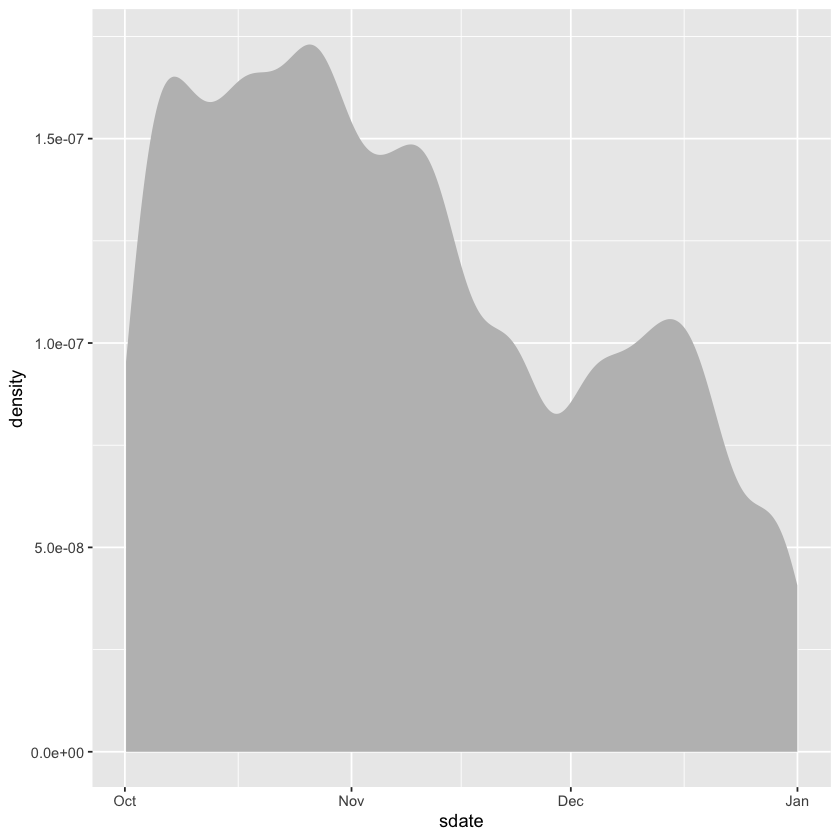

In [71]:
# the distribution of times that bikes were checked out
Trips %>%
  ggplot(aes(x = sdate)) +
    geom_density(fill = 'gray', color = NA)

---

### How long?

Make a box-and-whisker plot showing the distribution of the duration of rental events broken down by `client`. The duration of the rental can be calculated as `as.numeric(edate - sdate)`. The units will be in either hours, minutes, or seconds. It should not be much trouble for you to figure out which one. When you make your plot, you will likely find that the axis range is being set by a few outliers. These may be bikes that were forgotten. Arrange your scale to ignore these outliers, or filter them out.

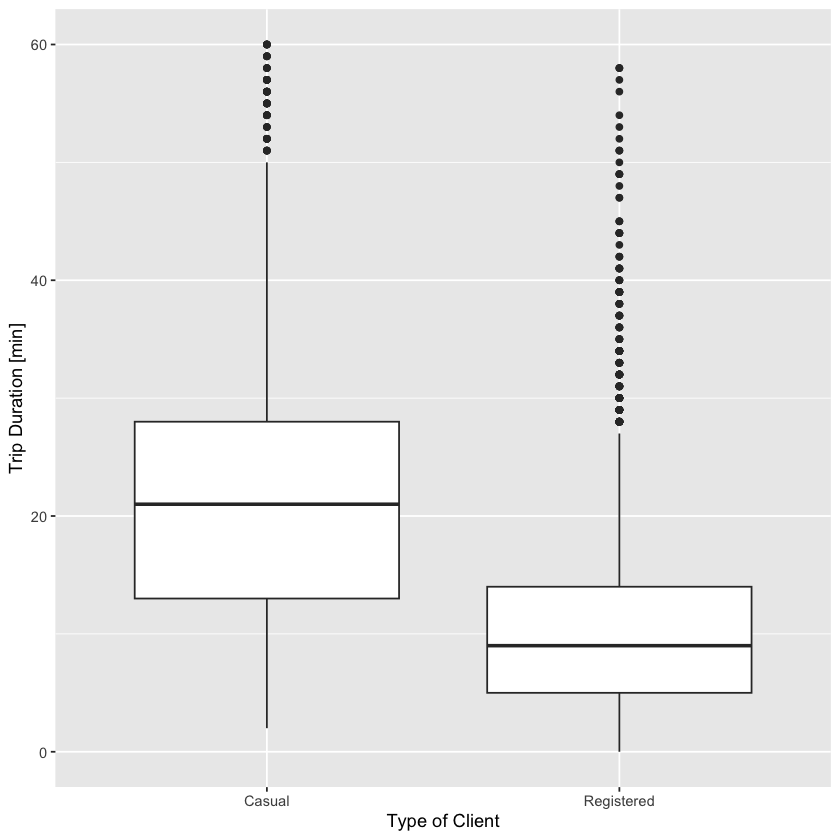

In [72]:
Trips %>%
  mutate(duration = as.numeric(edate - sdate)) %>%
  filter(duration <= 3600) %>%
  ggplot() +
    geom_boxplot(
      mapping = aes(x = client, y = duration / 60)
    ) +
    labs(x = 'Type of Client', y = 'Trip Duration [min]')

---

### When are bikes used?

[1] Variable `Trips$sdate` indicates the datetime that the bicycle was checked out of the station. Make histograms or density plots of each of these discrete components. Explain what each plot is showing about how bikes are checked out. For example, the distribution by hour of the day shows that few bikes are checked out before 5am, and that there are busy times around rush hour: 8am and 5pm.

* Day of the year: bike rentals are highest in October; decline in November; and pick up again in the first half of December.
* Day of the week: bike rentals are fairly stable over the course of the week; Thursday and Friday see the most rentals, and Saturday and Sunday see the least. Monday sees a little bit more than Tuesday and Wednesday.
* Hour of the day: bike rentals are low before 5:00am; spike up during morning rush hour; decrease a bit throughout the day; spike back up during evening rush hour; and rapidly decline to early morning levels into the night.
* Minute of the hour: I'm not sure there's much of a trend along this scale, other than that the numbers of rentals oscillate a bit (i.e., it is not fixed).

 [2] A similar sort of display of events per hour can be accomplished by calculating and displaying each hour's count. The graphic shows a lot of variation of bike use over the course of the day. Now consider two additional variables: the day of the week and the client type. Group the bike rentals by three variables: hour of the day, day of the week, and client type. Find the total number of events in each grouping and plot this count versus hour. Use the `group` aesthetic to represent one of the other variables and faceting to represent the other. (Hint: utilize `facet_wrap()` in the plotting commands.) Make the same sort of display of how bike rental vary of hour, day of the week, and client type, but use `geom_density()` rather than grouping and counting. Compare the two displays--one of discrete counts and one of density--and describe any major differences.

Generally, registered clients rent more bikes than casual clients across hour of the day and across day of the week. On an hourly basis, however, casual client rentals usually reach a maximum in the afternoon, when registered client rentals dip in between morning and evening rush hour. Also, casual client rentals peak over the weekend, when registered client rentals drop the most.

In [73]:
Trips$sdate[1]
lubridate::yday(Trips$sdate)[1] # day of the year from 1 to 365
lubridate::wday(Trips$sdate)[1] # day of the week from Sunday to Saturday
lubridate::hour(Trips$sdate)[1] # hour of the day
lubridate::minute(Trips$sdate)[1] # minute of the hour

[1] "2014-10-15 08:58:00 UTC"

[1] 288

[1] 4

[1] 8

[1] 58

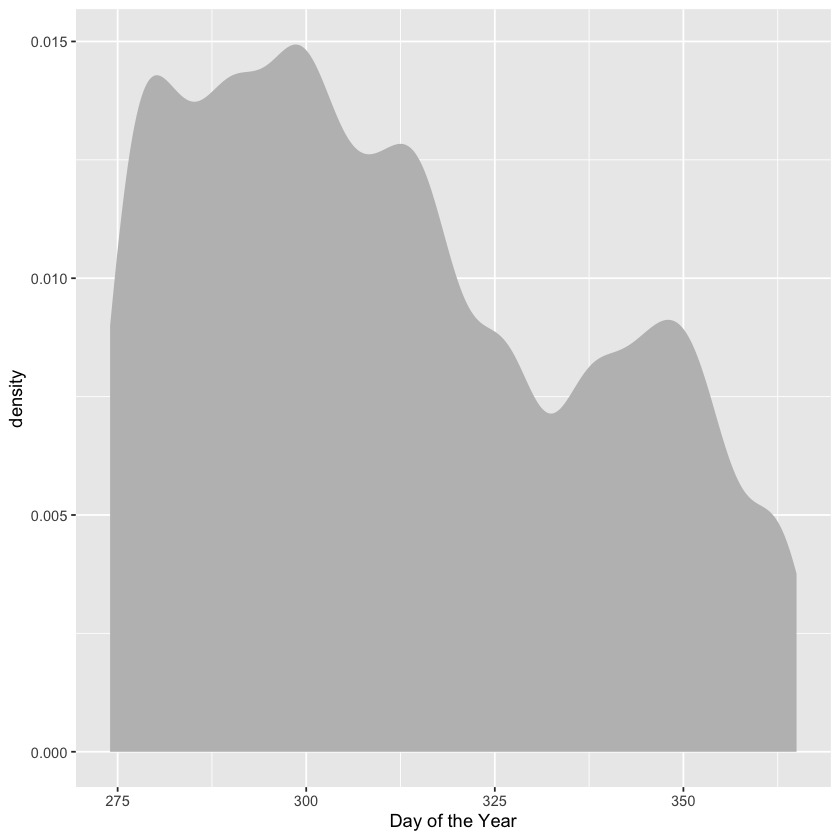

In [74]:
Trips %>%
  ggplot(aes(x = lubridate::yday(sdate))) +
    geom_density(fill = 'gray', color = NA) +
    xlab('Day of the Year')

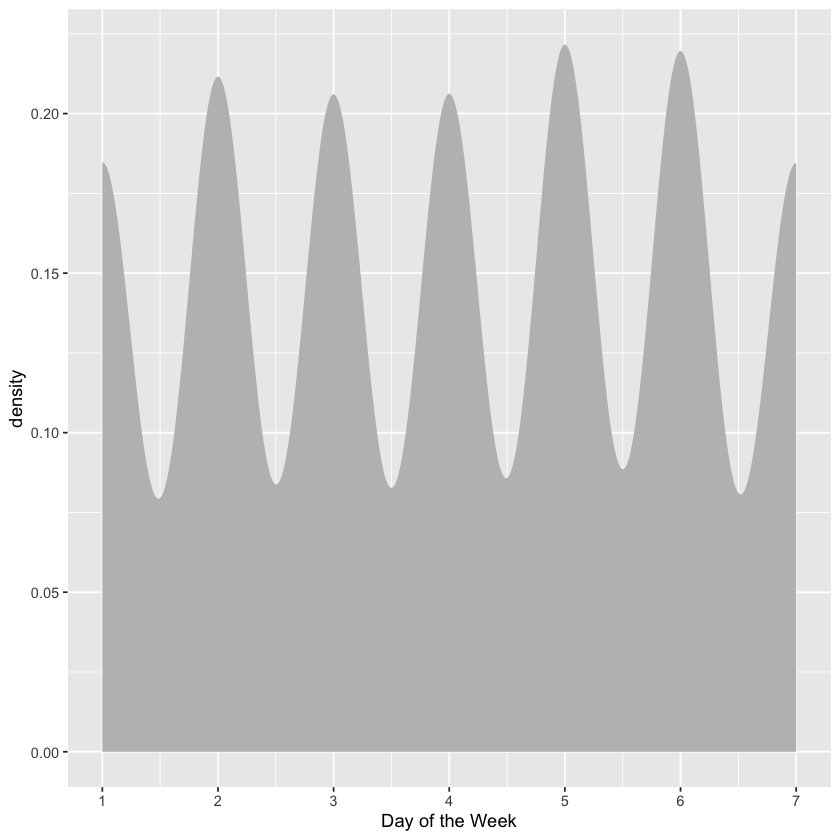

In [75]:
Trips %>%
  ggplot(aes(x = lubridate::wday(sdate))) +
    geom_density(fill = 'gray', color = NA) +
    xlab('Day of the Week') +
    scale_x_continuous(breaks = 0:8)

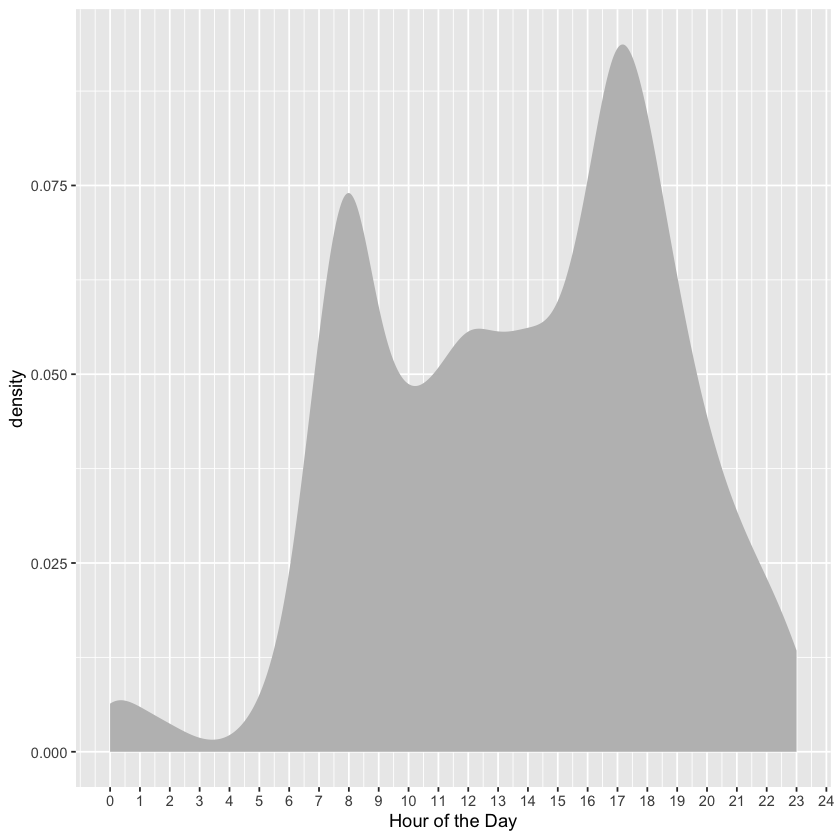

In [76]:
Trips %>%
  ggplot(aes(x = lubridate::hour(sdate))) +
    geom_density(fill = 'gray', color = NA) +
    xlab('Hour of the Day') +
    scale_x_continuous(breaks = 0:24)

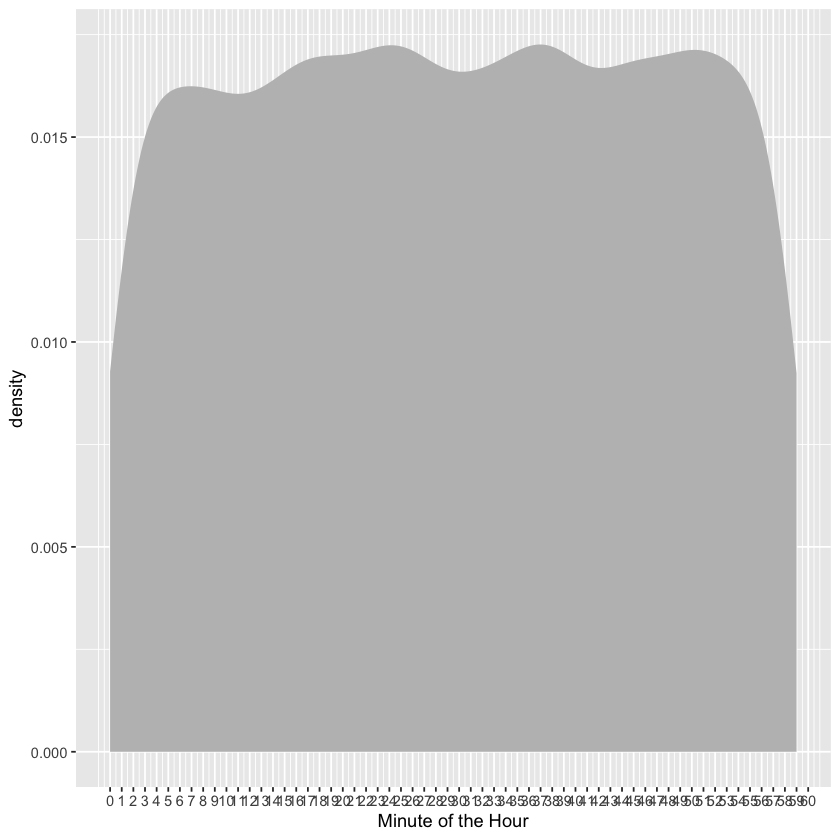

In [77]:
Trips %>%
  ggplot(aes(x = lubridate::minute(sdate))) +
    geom_density(fill = 'gray', color = NA) +
    xlab('Minute of the Hour') +
    scale_x_continuous(breaks = 0:60)

In [78]:
Trips %>%
  mutate(
    HOD = lubridate::hour(sdate),
    DOW = lubridate::wday(sdate),
  ) %>%
  group_by(HOD, DOW, client) %>%
  summarize(total = n()) %>%
  head()

`summarise()` has grouped output by 'HOD', 'DOW'. You can override using the
`.groups` argument.


HOD DOW client     total
1 0   1   Casual      1   
2 0   1   Registered 30   
3 0   2   Registered  5   
4 0   3   Casual      2   
5 0   3   Registered  8   
6 0   4   Registered  7

`summarise()` has grouped output by 'HOD', 'DOW'. You can override using the
`.groups` argument.


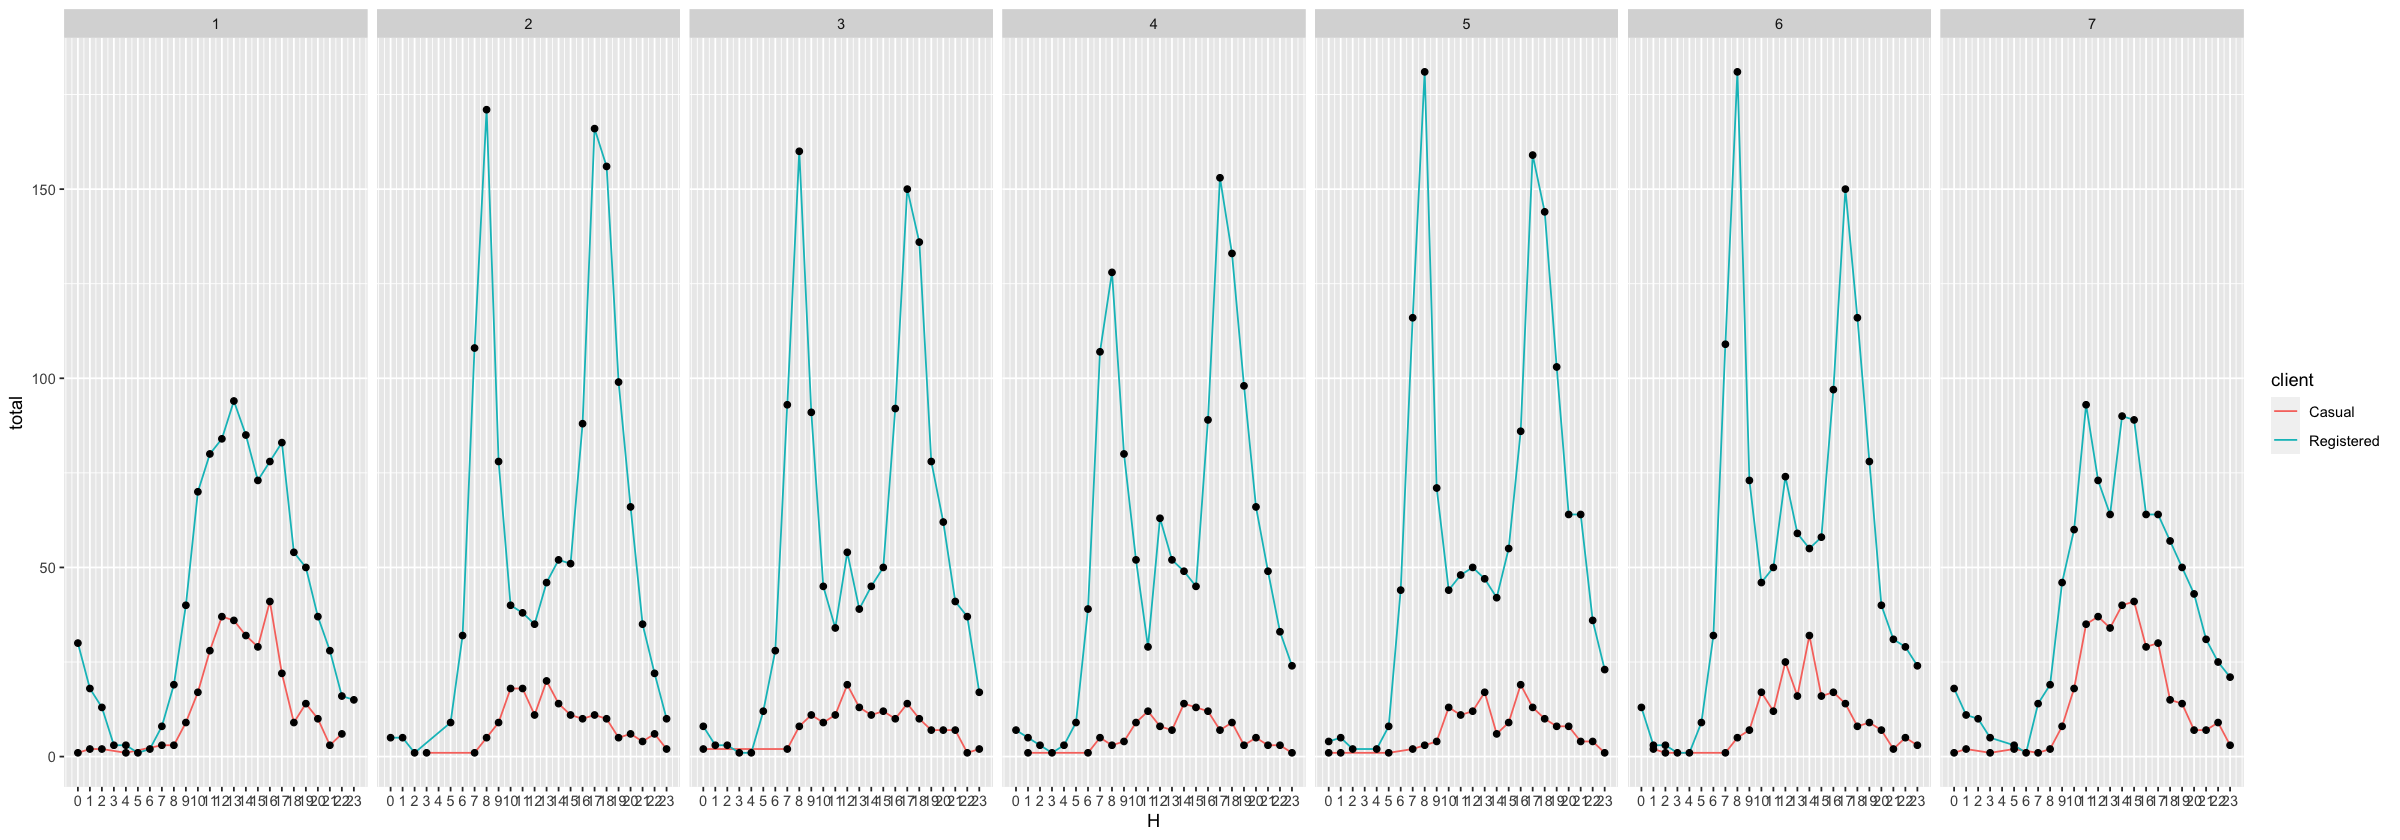

In [79]:
options(repr.plot.width = 20)

Trips %>%
  mutate(
    HOD = lubridate::hour(sdate),
    DOW = lubridate::wday(sdate),
  ) %>%
  group_by(HOD, DOW, client) %>%
  summarize(total = n()) %>%
  ggplot(mapping = aes(x = HOD, y = total)) +
    geom_line(mapping = aes(color = client)) + # the `group` aesthetic is unnecessary when using the `color` aesthetic
    geom_point() +
    facet_wrap(. ~ DOW, nrow = 1) +
    xlab('H') +
    scale_x_continuous(breaks = 0:23)

options(repr.plot.width =  7)

---

### How far?

Find the distance between each pair of stations. You know the position from the `lat` and `long` variables in `Stations`. This is enough information to find the distance. The calculation has been implemented in the `haversine()` function. `haversine()` is a transformation function. To use it, create a data table where a case is a pair of stations and there are variables for the latitude and longitude of the starting station and the ending station. To do this, join the `Station` data to itself. The statements `Simple` and `Simple2` show how to create appropriately named variables for joining. Look the `head()` of `Simple` and `Simple2` and make sure you understand how they are related to `Stations`. The joining of `Simple` and `Simple2` should match every station to every other station. (Since a ride can start and end at the same station, it also makes sense to match each station to itself.) This sort of matching does not make use of any matching variables; everything is matched to everything else. This is called a full outer join. (A full outer join matches every case in the left table to each and every case in the right table.) Make sure you understand what the full outer join does before proceeding. For instance, you should be able to predict how many cases the output will have when the left input has n cases and the right has m cases.

[1] There are 347 cases in the `Stations` data table. How many cases will there be in a full outer join of `Simple` to `Simple2`?

$120409 = 347 \times 347$

It's often impractical to carry out a full outer join. For example, joining `BabyNames` to itself with a full outer join will generate a result with more than three trillion cases. (Three trillion cases from the `BabyNames` data is the equivalent of about 5 million hours of MP3 compressed music. A typical human lifespan is about 0.6 million hours.) Perform the full outer join and then use `haversine()` to compute the distance between each pair of stations. Check your result for sensibility. Make a histogram of the station-to-station distances and explain where it looks like what you would expect. (Hint: you could use the Internet to look up the distance from one end of Washington, D.C. to the other.) Once you have `PairDistances`, you can join it with `Trips` to calculate the start-to-end distance of each trip. (Of course, a rider may not go directly from one station to another.)

[2] Look at the variables in `Stations` and `Trips` and explain why `Simple` and `Simple2` were given different variable names for the station.

`Simple` and `Simple2` were given different variable names for the station because we want start station-end station pairs, which serves as the composite key on which we join the resulting table to the `Trips` table. If we don't explicitly change the name of the `name` variable, then we won't have a composite key on which to join the resulting table to the `Trips` table.

An `inner_join()` is appropriate for finding the distance of each ride. (Watch out! The `Trips` data and the `PairDistances` data are large enough that the join is expensive: it takes about a minute.) Display the distribution of the ride distances of the ride.

[3] Compare it to the distances between pairs of stations. Are they similar? Why or why not?

The visualization shows that the pairwise distance between stations has a larger spread than trip distance, which is skewed to the right (i.e., most trips are short, whereas a fair number of station-station distances are quite large: these routes are probably not used very often).

In [80]:
Simple <-
  Stations %>%
    select(name, lat, long) %>%
    rename(sstation = name)
Simple2 <-
  Simple %>%
    rename(estation = sstation, lat2 = lat, long2 = long)
StationPairs <-
  merge(Simple, Simple2, by = NULL)
PairDistances <-
  StationPairs %>%
    mutate(distance = haversine(lat, long, lat2, long2)) %>%
    select(sstation, estation, distance)

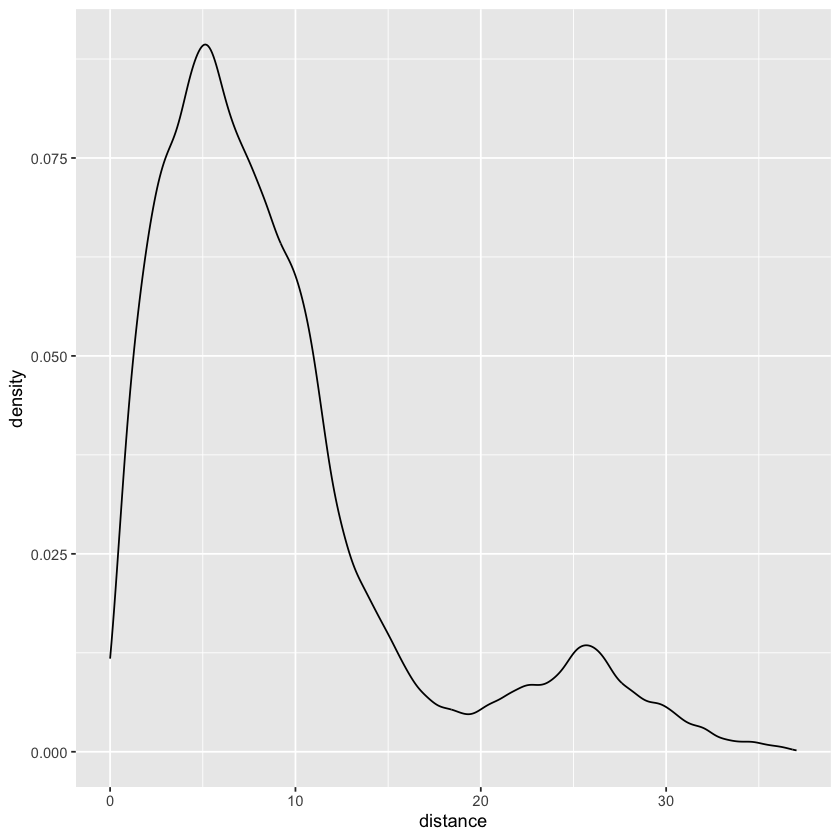

In [81]:
PairDistances %>%
  ggplot() +
    geom_density(aes(x = distance))

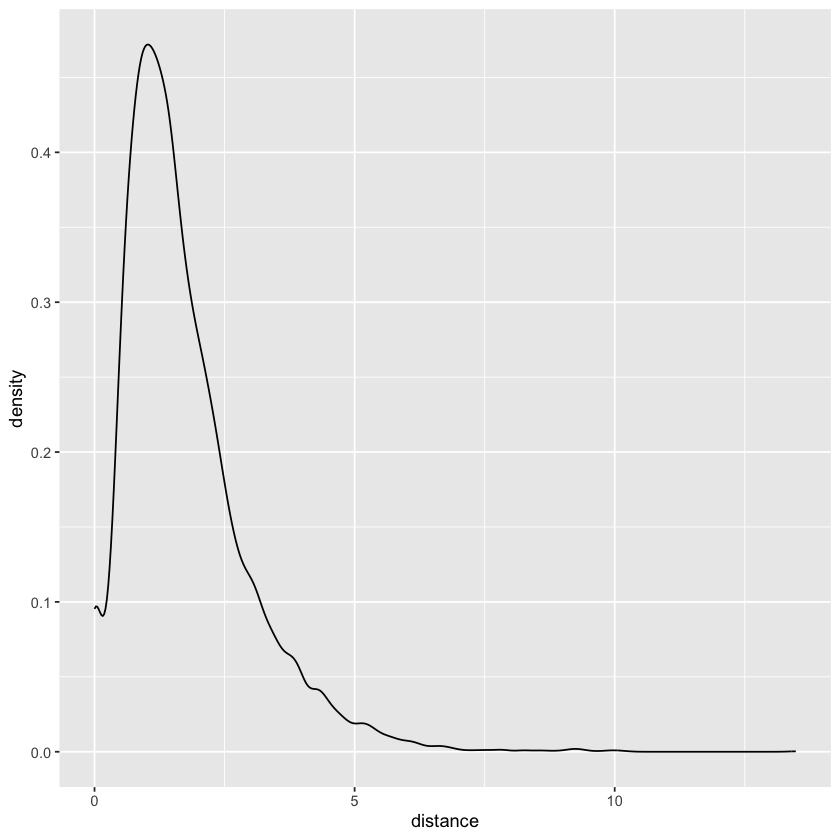

In [82]:
Trips %>%
  inner_join(PairDistances, by = c('sstation', 'estation')) %>%
  ggplot(aes(x = distance)) +
    geom_density()

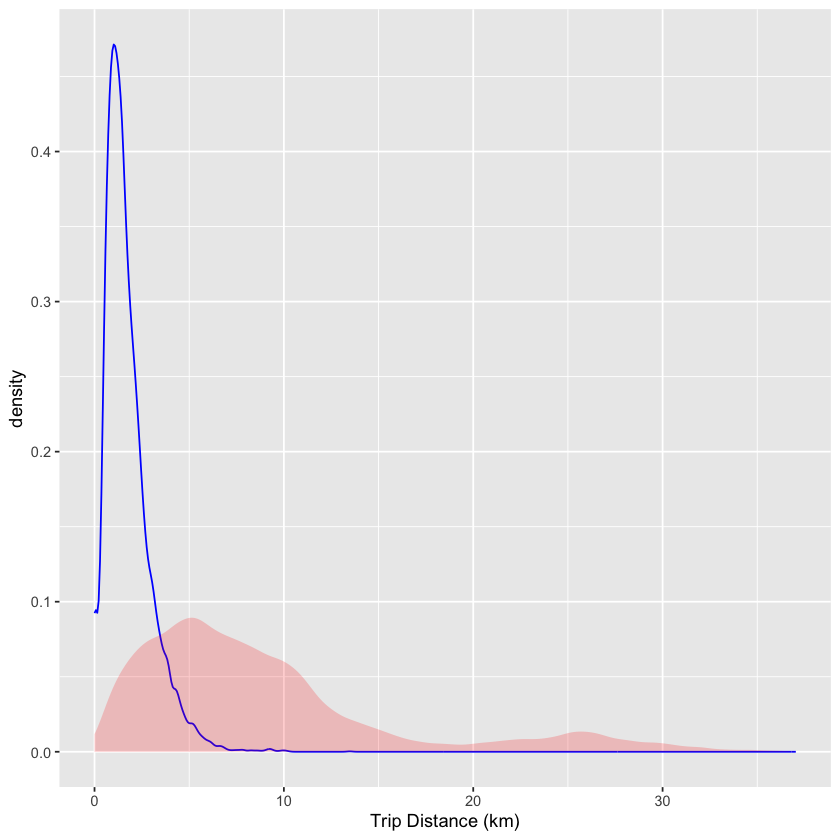

In [83]:
Trips %>%
  inner_join(PairDistances, by = c('sstation', 'estation')) %>%
  ggplot(aes(x = distance)) +
    geom_density(
      color = 'blue'
    ) +
    geom_density(
      alpha = 0.2,
      color = NA,
      data  = PairDistances,
      fill  = 'red'
    ) +
    xlab('Trip Distance (km)')

---

### Mapping the stations

You can draw detailed maps with the `leaflet` package. You may need to install it. `leaflet` works much like `ggplot()` but provides special facilities for maps.

In [84]:
stationMap <-
  leaflet(Stations) %>%
    addTiles() %>%
    addCircleMarkers(radius = 2, color = 'red')
    #setView(-77.04, 38.9, zoom = 12)
stationMap

Assuming "long" and "lat" are longitude and latitude, respectively



HTML widgets cannot be represented in plain text (need html)

---

### Long-distance stations

Around each station on the map, draw a circle whose radius reflects the median distance covered by rentals starting at that station. To draw the circles, use the same `leaflet` commands as before, but add in a line like this: `addCircles(radius = ~ mid, color = "blue", opacity = 0.0001)`. For `addCircles()` to draw circles at the right scale, the units of the median distance should be presented in meters rather than kilometers. This will create too much overlap, unfortunately. So, set the radius to be half or one-third the median distance in meters. From your map, explain the pattern you see in the relationship between station location and median distance.

---

## Project: Bird Species
[Project: Bird Species](https://dtkaplan.github.io/DataComputingEbook/project-bird-species.html#project-bird-species) from Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

---

In [85]:
?dcData::OrdwayBirds

OrdwayBirds               package:dcData               R Documentation

_B_i_r_d_s _c_a_p_t_u_r_e_d _a_n_d _r_e_l_e_a_s_e_d _a_t _O_r_d_w_a_y, _c_o_m_p_l_e_t_e _a_n_d _u_n_c_l_e_a_n_e_d

_D_e_s_c_r_i_p_t_i_o_n:

     The historical record of birds captured and released at the
     Katharine Ordway Natural History Study Area, a 278-acre preserve
     in Inver Grove Heights, Minnesota, owned and managed by Macalester
     College.

_U_s_a_g_e:

     data("OrdwayBirds")
     
_F_o_r_m_a_t:

     A data frame with 15,829 observations on the following 26
     variables:

     bogus

     Timestamp indicates when the data were entered into an electronic
          record, not anything about the bird being described

     Year year of capture

     Day day of capture

     Month month of capture

     CaptureTime time of capture

     SpeciesName

     Sex

     Age

     BandNumber

     TrapID

     Weather

     Bandi

In [86]:
?dcData::OrdwaySpeciesNames

OrdwaySpeciesNames           package:dcData            R Documentation

_C_o_r_r_e_c_t_e_d _S_p_e_c_i_e_s _N_a_m_e_s _f_o_r _t_h_e _O_r_d_w_a_y _B_i_r_d_s

_D_e_s_c_r_i_p_t_i_o_n:

     This data frame lists all the species name that appear in
     `OrdwayBirds`. In many cases, the species name was mis-spelled in
     the original. As a result, many birds are listed as separate
     species even though, in reality, they all belong to the same
     species. For each potentially mis-spelled species name, this table
     gives a standardized name.

_U_s_a_g_e:

     data("OrdwaySpeciesNames")
     
_F_o_r_m_a_t:

     A data frame with 265 observations on the following 2 variables:

     SpeciesName The original spelling, or misspelling, of a bird
          species.

     SpeciesNameCleaned Corrected spelling (or NA if the original was
          not identifiable.)

_S_o_u_r_c_e:

     Daniel Kaplan and students in a 2013 Da

In [87]:
OrdwayBirds %>%
  select(Month, Day) %>%
  head()

Month Day
3  7    16 
4 NA    NA 
5  7    16 
6  7    16 
7  7    16 
8  7    16

In [88]:
OrdwayBirds <-
  OrdwayBirds %>%
  select(SpeciesName, Month, Day) %>%
  mutate(
    Month = as.numeric(as.character(Month)),
    Day   = as.numeric(as.character(Day))
  )
OrdwayBirds %>%
  head()

SpeciesName   Month Day
3 Song Sparrow   7    16 
4               NA    NA 
5 Song Sparrow   7    16 
6 Field Sparrow  7    16 
7 Field Sparrow  7    16 
8 Song Sparrow   7    16

In [89]:
OrdwaySpeciesNames %>%
  filter(is.na(SpeciesNameCleaned))

SpeciesName            SpeciesNameCleaned
1                         NA                
2  -lost-                 NA                
3  -missing-              NA                
4  [Nothing, just dashes] NA                
5  13:00:00               NA                
6  Bank Swallow           NA                
7  Barn Swallow           NA                
8  Bay-breasted Warbler   NA                
9  Blackpoll Warbler      NA                
10 Blue Jay               NA                
11 Blue-headed Vireo      NA                
12 Blue-winged Warbler    NA                
13 Bluebird               NA                
14 Boreal Chickadee       NA                
15 Brewer's Sparrow       NA                
16 Brown Creeper          NA                
17 Brown Thrasher         NA                
18 Brown Towhee           NA                
19 Cactus Wren            NA                
20 Common Crow            NA                
21 Common Grackle         NA                
22 Common Nighthawk       NA                
23 Common Redpoll         NA                
24 Common Yellowthroat    NA                
25 Connecticut Warbler    NA                
26 Downy Woodpecker       NA                
27 E Bluebird             NA                
28 Eastern Bluebird       NA                
29 Eastern Kingbird       NA                
30 Eastern Meadowlark     NA                
31 Eastern Robin          NA                
32 Flicker                NA                
33 Fox Sparrow            NA                
34 Goldfinch              NA                
35 Grackle                NA                
36 Green Heron            NA                
37 Ground Dove            NA                
38 Hairy Woodpecker       NA                
39 Hermit Thrush          NA                
40 Horned Lark            NA                
41 House Finch            NA                
42 House Sparrow          NA                
43 Inca Dove              NA                
44 Indigo Bunting         NA                
45 Killdeer               NA                
46 Kingbird               NA                
47 Kiskadee F.C.          NA                
48 Magnolia Warbler       NA                
49 Mockingbird            NA                
50 Rough-winged Swallow   NA

---

### Task 1

[1] Including misspellings, how many different species are there in the `OrdwayBirds` data?

There are 275 unique values of the variable `SpeciesName`. This reduces to 268 after dropping the following invalid values:
* `''`
* `'-lost-'`
* `'-missing-'`
* `'13:00:00'`
* `'[Nothing, just dashes]'`
* `'lost'`
* `'none'`

[2] Consider the `OrdwaySpeciesNames` data frame also found in the `dcData` package as well. How many distinct species are there in the `SpeciesNameCleaned` variable in `OrdwaySpeciesNames`? You will find it helpful to use `n_distinct()` a reduction function, which counts the number of unique values in a variable.

There are 108 unique values of the variable `SpeciesNameCleaned` after accounting for the value `NA`.

In [90]:
OrdwayBirds %>%
  count(SpeciesName)

SpeciesName               n   
1                                4
2   -lost-                       1
3   -missing-                    1
4   13:00:00                     1
5   Acadian Flycatcher           1
6   American Gold Finch         50
7   American Goldfinch        1153
8   American Golf Finch          1
9   American Redfinch            1
10  American Redstart            3
11  American Robin               4
12  Arkansas Kingbird            1
13  Baltimore Oriole           206
14  Bank Swallow                21
15  Barn Swallow                23
16  Batimore Oriole              1
17  Bay-breasted Warbler         2
18  Blac-capped Chickadee        1
19  Black and White Warbler      9
20  Black-Capped Chickadee      13
21  Black-and-white Warbler      1
22  Black-billed Cookoo          1
23  Black-billed Cuckoo         15
24  Black-capeed Chickadee       1
25  Black-capped Chicakdee       1
26  Black-capped Chickadee    1110
27  Black-capped Chikadee        1
28  Black-capped chickadee     187
29  Black-throat Sparrow        31
30  Black-throat-Sparrow         1
⋮   ⋮                         ⋮   
246 White-breast Nuthatch      23 
247 White-breasted Nuthatch   236 
248 White-crown Sparrow        17 
249 White-crowned Sparrow      78 
250 White-eyed Vireo            1 
251 White-thorat Sparrow        1 
252 White-throat Sparrow       86 
253 White-throated Sparrow    229 
254 White-winged Junco          2 
255 Wht-brstd Nuthatch          1 
256 Wilson Warbler              4 
257 Wilson's Warbler           22 
258 Winter Wren                 1 
259 Wood Pewee                 37 
260 Wood Thrush                 3 
261 Woodcock                    1 
262 Wren                        2 
263 Yellow Flicker              1 
264 Yellow Shafted Flicker      4 
265 Yellow Warbler             19 
266 Yellow-bellied Flycatcher   7 
267 Yellow-bellied Sapsucker    3 
268 Yellow-shaft Flicker        6 
269 Yellow-shafted Flicker     34 
270 Yellow-shafted flicker      6 
271 Yellow-tailed Oriole        1 
272 Yellowthroat              107 
273 [Nothing, just dashes]      1 
274 lost                        1 
275 none                        2

In [91]:
OrdwayBirds %>%
  select(SpeciesName) %>%
    n_distinct()

[1] 275

In [92]:
OrdwaySpeciesNames %>%
  count(SpeciesNameCleaned)

SpeciesNameCleaned        n 
1   Acadian Flycatcher        1 
2   American Goldfinch        3 
3   American Redfinch         1 
4   American Redstart         1 
5   American Robin            1 
6   Arkansas Kingbird         1 
7   Baltimore Oriole          3 
8   Black and White Warbler   2 
9   Black-billed Cookoo       2 
10  Black-capped Chickadee    8 
11  Black-throat Sparrow      2 
12  Brown-headed Cowbird      2 
13  Cardinal                  2 
14  Carolina Chickadee        1 
15  Catbird                   4 
16  Cedar Waxwing             2 
17  Chestnut-backed Chickadee 1 
18  Chestnut-sided Warbler    1 
19  Chickadee                 2 
20  Chipping Sparrow          4 
21  Clay-colored Sparrow      3 
22  Cowbird                   1 
23  Curve-billed Thrasher     2 
24  Eastern Phoebe            2 
25  Eastern Wood Pewee        2 
26  Field Sparrow             2 
27  Golden-Crowned Kinglet    3 
28  Gray - cheeked Thrush     4 
29  Great Crested Flycatcher  3 
30  Harris's Sparrow          3 
⋮   ⋮                         ⋮ 
80  Tennessee Warbler          2
81  Traill's Flycatcher        1
82  Tree L                     1
83  Tree Swallow               4
84  Tufted Titmouse            1
85  Unknown                    1
86  Varied Thrush              1
87  Veery                      1
88  Vesper Sparrow             1
89  Warbling Vireo             1
90  White-Crested Sparrow      1
91  White-Fronted Dove         1
92  White-breasted Nuthatch    5
93  White-crowned Sparrow      2
94  White-eyed Vireo           1
95  White-throat Sparrow       5
96  White-winged Junco         1
97  Wilson's Warbler           2
98  Winter Wren                1
99  Wood Pewee                 1
100 Wood Thrush                1
101 Woodcock                   1
102 Wren                       1
103 Yellow Shafted Flicker     5
104 Yellow Warbler             1
105 Yellow-bellied Flycatcher  1
106 Yellow-bellied Sapsucker   1
107 Yellow-tailed Oriole       1
108 Yellowthroat               1
109 NA                        50

In [93]:
OrdwaySpeciesNames %>%
  select(SpeciesNameCleaned) %>%
    n_distinct()

[1] 109

---

### Task 2

Use the `OrdwaySpeciesNames` table to create a new data frame that corrects the misspellings in `SpeciesNames`. This can be done easily using the `inner_join()` data verb. Look at the names of the variables in `OrdwaySpeciesNames` and `OrdwayBirds`.

[1] Which variable(s) was used for matching cases?

The variable `SpeciesName` was used for matching cases.

[2] What were the variable(s) that will be added?

The variables `SpeciesNameCleaned` (renamed to `Species`), `Month`, and `Day` will be added.

In [94]:
Corrected <-
  OrdwayBirds %>%
    inner_join(y = OrdwaySpeciesNames) %>%
    select(Species = SpeciesNameCleaned, Month, Day) %>%
    na.omit()
Corrected %>%
  head()

Joining with `by = join_by(SpeciesName)`
Warning message in inner_join(., y = OrdwaySpeciesNames):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 4 of `x` matches multiple rows in `y`.
ℹ Row 211 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


Species       Month Day
1 Song Sparrow  7     16 
3 Song Sparrow  7     16 
4 Field Sparrow 7     16 
5 Field Sparrow 7     16 
6 Field Sparrow 7     16 
7 Field Sparrow 7     16

---

### Task 3

Call the variable that contains the total `count`. Arrange this into descending order from the species with the most birds, and look through the list. (Hint: Remember `n()`. Also, one of the arguments to one of the data verbs will be `desc(count)` to arrange the cases into descending order. Display the top 10 species in terms of the number of bird captures.) Define for yourself a "major species" as a species with more than a particular threshold count. Set your threshold so that there are 5 or 6 species designated as major. Filter to produce a data frame with only the birds that belong to a major species. Save the output in a table called `Majors`. (Hint: Remember that summary functions can be used case-by-case when filtering or mutating a data frame that has been grouped.)

[1] How many bird captures are reported for each of the corrected species?

See below for the result (major species threshold >= 1000).

In [95]:
Corrected %>%
  count(Species) %>%
  arrange(desc(n)) %>%
  head(n = 10)

Species                n   
1  Slate-colored Junco    2732
2  Tree Swallow           1537
3  Black-capped Chickadee 1327
4  American Goldfinch     1204
5  Field Sparrow          1164
6  Lincoln's Sparrow       790
7  Robin                   608
8  Catbird                 554
9  Song Sparrow            512
10 House Wren              460

In [96]:
Corrected %>%
  group_by(Species) %>%
  summarize(count = n()) %>%
  arrange(desc(count)) %>%
  head(n = 10)

Species                count
1  Slate-colored Junco    2732 
2  Tree Swallow           1537 
3  Black-capped Chickadee 1327 
4  American Goldfinch     1204 
5  Field Sparrow          1164 
6  Lincoln's Sparrow       790 
7  Robin                   608 
8  Catbird                 554 
9  Song Sparrow            512 
10 House Wren              460

In [97]:
Majors <-
  Corrected %>%
    group_by(Species) %>%
    summarize(count = n()) %>%
    arrange(desc(count)) %>%
    filter(count >= 1000)
Majors

Species                count
1 Slate-colored Junco    2732 
2 Tree Swallow           1537 
3 Black-capped Chickadee 1327 
4 American Goldfinch     1204 
5 Field Sparrow          1164

---

### Task 4

When you have correctly produced `Majors`, write a command that produces the month-by-month count of each of the major species. Call this table `ByMonth`. Display this month-by-month count with a bar chart arranged in a way that you think tells the story of what time of year the various species appear. You can use `mplot()` to explore different possibilies. (Warning: `mplot()` and similar interactive functions should not appear in your Rmd file, it needs to be used interactively from the console. Use the "Show Expression" button in `mplot()` to create an expression that you can cut and paste into a chunk in your Rmd document, so that the graph gets created when you compile it.) Once you have the graph, use it to answer these questions:

[1] Which species are present year-round?

* American Goldfinch (11-12 mo)
* Black-capped Chickadee (12 mo)

[2] Which species are migratory, that is, primarily present in one or two seasons?

* Field Sparrow (6 mo)
* Slate-colored Junco (8-9 mo)
* Tree Swallow (3-5 mo)

[3] What is the peak month for each major species?

* `10` American Goldfinch
* `11` Black-capped Chickadee
* `05` Field Sparrow
* `10` Slate-colored Junco
* `06` Tree Swallow

[4] Which major species are seen in good numbers for at least 6 months of the year? (Hint: `n_distinct()` and `>= 6`.)

Arguably, the only species that is not seen in good numbers for at least 6 months of the year is the tree swallow.

In [98]:
ByMonth <-
  OrdwayBirds %>%
    group_by(SpeciesName, Month = as.integer(Month)) %>%
    summarize(count = n()) %>%
    filter(SpeciesName %in% Majors$Species)
ByMonth

`summarise()` has grouped output by 'SpeciesName'. You can override using the
`.groups` argument.


SpeciesName            Month count
1  American Goldfinch      1      10 
2  American Goldfinch      2      51 
3  American Goldfinch      3      48 
4  American Goldfinch      4      21 
5  American Goldfinch      5     125 
6  American Goldfinch      6      63 
7  American Goldfinch      7      67 
8  American Goldfinch      8      70 
9  American Goldfinch      9     151 
10 American Goldfinch     10     364 
11 American Goldfinch     11     180 
12 American Goldfinch     12       3 
13 Black-capped Chickadee  1      56 
14 Black-capped Chickadee  2     140 
15 Black-capped Chickadee  3      96 
16 Black-capped Chickadee  4      51 
17 Black-capped Chickadee  5      48 
18 Black-capped Chickadee  6      20 
19 Black-capped Chickadee  7      13 
20 Black-capped Chickadee  8      11 
21 Black-capped Chickadee  9      66 
22 Black-capped Chickadee 10     173 
23 Black-capped Chickadee 11     271 
24 Black-capped Chickadee 12     165 
25 Field Sparrow           4      83 
26 Field Sparrow           5     197 
27 Field Sparrow           6      15 
28 Field Sparrow           7      79 
29 Field Sparrow           8      64 
30 Field Sparrow           9      74 
31 Field Sparrow          10      69 
32 Field Sparrow          11       1 
33 Slate-colored Junco     1     113 
34 Slate-colored Junco     2      61 
35 Slate-colored Junco     3     188 
36 Slate-colored Junco     4     694 
37 Slate-colored Junco     5       1 
38 Slate-colored Junco     8       1 
39 Slate-colored Junco     9      35 
40 Slate-colored Junco    10    1178 
41 Slate-colored Junco    11     272 
42 Slate-colored Junco    12     174 
43 Tree Swallow            4       2 
44 Tree Swallow            5      11 
45 Tree Swallow            6     171 
46 Tree Swallow            7      16 
47 Tree Swallow           11       1

In [99]:
ByMonth %>%
  group_by(SpeciesName) %>%
  summarize(
    MonthsPerYear   = n(),
    SixMonthsOrMore = n_distinct(Month) >= 6
  )

SpeciesName            MonthsPerYear SixMonthsOrMore
1 American Goldfinch     12             TRUE          
2 Black-capped Chickadee 12             TRUE          
3 Field Sparrow           8             TRUE          
4 Slate-colored Junco    10             TRUE          
5 Tree Swallow            5            FALSE

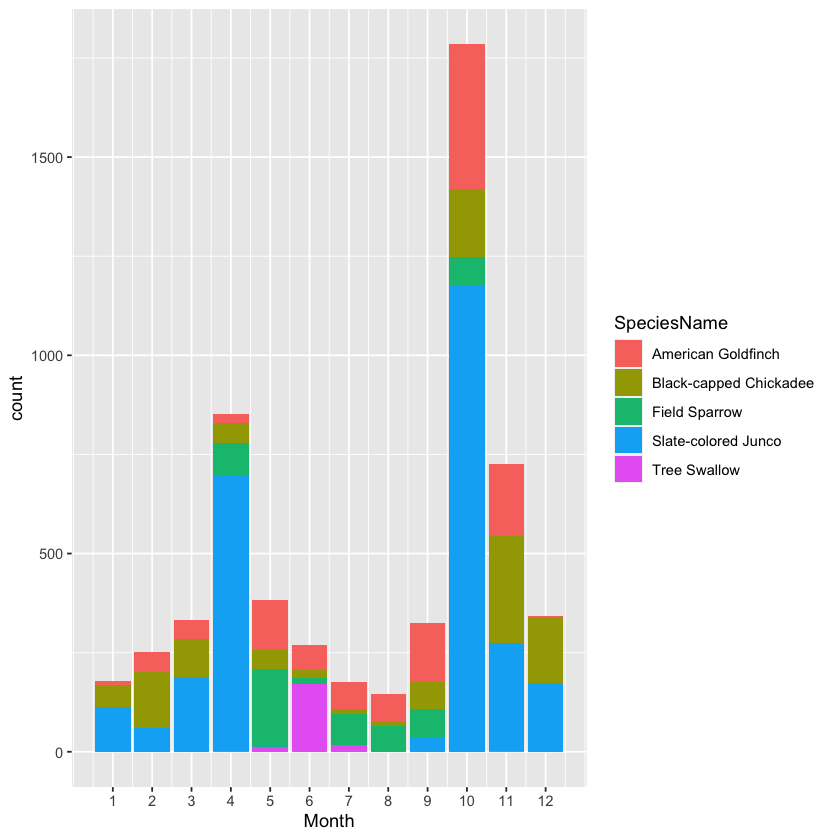

In [100]:
ByMonth %>%
  ggplot() +
    geom_bar(
      mapping     = aes(x = Month, y = count, fill = SpeciesName),
      na.rm       = FALSE,
      position    = 'stack',
      show.legend = TRUE,
      stat        = 'identity'
    ) +
    scale_x_continuous(breaks = 1:12)

---

## Project: Scraping Nuclear Reactors
[Project: Scraping Nuclear Reactors](https://dtkaplan.github.io/DataComputingEbook/project-scraping-nuclear-reactors.html#project-scraping-nuclear-reactors) from Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

---

In what ways is the table tidy? How is it not tidy? What's different about it from a tidy table?

Tidy Data Criteria
* (i) rows (or cases, observations) must each represent the same underlying attribute (i.e., each observation must have its own row)
* (ii) columns (or variables, values) must each contain the same type of value for each row (i.e., each variable must have its own column)
* (iii) each value must have its own cell
* It's impossible to only satisfy two of the three criteria. This implies the following.
  * (i) put each dataset into a tibble
  * (ii) put each variable into a column

There is at least one row that does not represent a typical case (that is, the header row(s)). Certain columns are blank and need to be removed. The remaining columns may contain heterogeneous data formats or data types. And missing values must be addressed. But with some cleaning, the table hints at what a typical case should look like.

In [101]:
page      <- 'https://en.wikipedia.org/wiki/List_of_commerical_nuclear_reactors'
tableList <-
  page %>%
    read_html() %>%
    html_nodes(css = 'table') %>%
    html_table(fill = TRUE)
length(tableList)

Japan <-
  tableList[[21]] %>%
    select(1:9)
#names(Japan)[c(3, 6)] <- c('type', 'grossMW')
head(Japan)

[1] 55

Plantname         UnitNo. Type Model Status     Capacity(MW) Beginbuilding
1 Plantname         UnitNo. Type Model Status     Capacity(MW) Beginbuilding
2 Fukushima Daiichi 1       BWR  BWR-3 Inoperable 439          25 Jul 1967  
3 Fukushima Daiichi 2       BWR  BWR-4 Inoperable 760          9 Jun 1969   
4 Fukushima Daiichi 3       BWR  BWR-4 Inoperable 760          28 Dec 1970  
5 Fukushima Daiichi 4       BWR  BWR-4 Inoperable 760          12 Feb 1973  
6 Fukushima Daiichi 5       BWR  BWR-4 Shut down  760          22 May 1972  
  Commercialoperation Closed     
1 Commercialoperation Closed     
2 26 Mar 1971         19 May 2011
3 18 Jul 1974         19 May 2011
4 27 Mar 1976         19 May 2011
5 12 Oct 1978         19 May 2011
6 18 Apr 1978         17 Dec 2013

Among other things, some of the variable names appear redundant and others have multiple words separated by spaces. You can rename variables using the data verb `rename()`, finding appropriate names from the Wikipedia table. Another problem is that the first row is not data but a continuation of the variable names. So row number 1 should be dropped.

In [102]:
Japan <-
  Japan %>%
    filter(row_number() > 1) %>%
    rename(
      name         = Plantname,
      reactor      = `UnitNo.`,
      type         = Type,
      model        = Model,
      status       = Status,
      netMW        = `Capacity(MW)`,
      construction = Beginbuilding,
      operation    = Commercialoperation,
      closure      = Closed
    )
head(Japan)

name              reactor type model status     netMW construction
1 Fukushima Daiichi 1       BWR  BWR-3 Inoperable 439   25 Jul 1967 
2 Fukushima Daiichi 2       BWR  BWR-4 Inoperable 760   9 Jun 1969  
3 Fukushima Daiichi 3       BWR  BWR-4 Inoperable 760   28 Dec 1970 
4 Fukushima Daiichi 4       BWR  BWR-4 Inoperable 760   12 Feb 1973 
5 Fukushima Daiichi 5       BWR  BWR-4 Shut down  760   22 May 1972 
6 Fukushima Daiichi 6       BWR  BWR-5 Shut down  1067  26 Oct 1973 
  operation   closure    
1 26 Mar 1971 19 May 2011
2 18 Jul 1974 19 May 2011
3 27 Mar 1976 19 May 2011
4 12 Oct 1978 19 May 2011
5 18 Apr 1978 17 Dec 2013
6 24 Oct 1979 17 Dec 2013

In [103]:
str(Japan)

tibble [68 × 9] (S3: tbl_df/tbl/data.frame)
 $ name        : chr [1:68] "Fukushima Daiichi" "Fukushima Daiichi" "Fukushima Daiichi" "Fukushima Daiichi" ...
 $ reactor     : chr [1:68] "1" "2" "3" "4" ...
 $ type        : chr [1:68] "BWR" "BWR" "BWR" "BWR" ...
 $ model       : chr [1:68] "BWR-3" "BWR-4" "BWR-4" "BWR-4" ...
 $ status      : chr [1:68] "Inoperable" "Inoperable" "Inoperable" "Inoperable" ...
 $ netMW       : chr [1:68] "439" "760" "760" "760" ...
 $ construction: chr [1:68] "25 Jul 1967" "9 Jun 1969" "28 Dec 1970" "12 Feb 1973" ...
 $ operation   : chr [1:68] "26 Mar 1971" "18 Jul 1974" "27 Mar 1976" "12 Oct 1978" ...
 $ closure     : chr [1:68] "19 May 2011" "19 May 2011" "19 May 2011" "19 May 2011" ...


Using your cleaned data, make a plot of net generation capacity versus date of construction. Color the points by the type of reactor (for example, BWR, PWR, etc.) In addition to your plot, give a sentence or two of interpretation; what patterns do you see?

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `closure = lubridate::dmy(closure)`.
Caused by warning:
!  6 failed to parse.”


name              reactor type model status     netMW construction operation 
1 Fukushima Daiichi 1       BWR  BWR-3 Inoperable  439  1967-07-25   1971-03-26
2 Fukushima Daiichi 2       BWR  BWR-4 Inoperable  760  1969-06-09   1974-07-18
3 Fukushima Daiichi 3       BWR  BWR-4 Inoperable  760  1970-12-28   1976-03-27
4 Fukushima Daiichi 4       BWR  BWR-4 Inoperable  760  1973-02-12   1978-10-12
5 Fukushima Daiichi 5       BWR  BWR-4 Shut down   760  1972-05-22   1978-04-18
6 Fukushima Daiichi 6       BWR  BWR-5 Shut down  1067  1973-10-26   1979-10-24
  closure   
1 2011-05-19
2 2011-05-19
3 2011-05-19
4 2011-05-19
5 2013-12-17
6 2013-12-17

Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


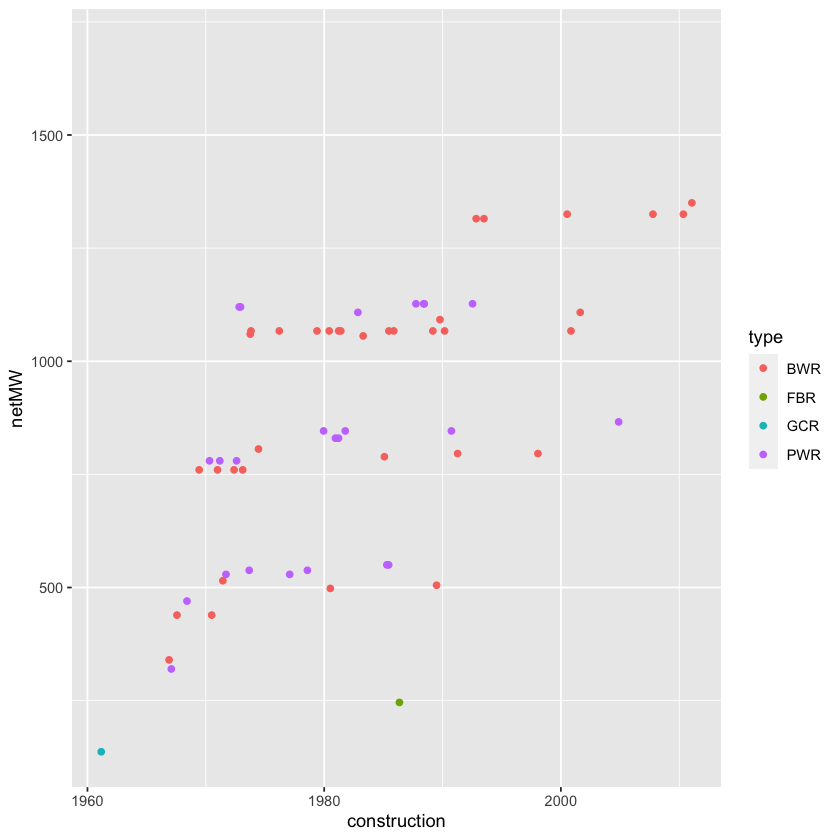

In [104]:
# BWR boiling water reactor
# FBR
# GCR
# PWR pressurized water reactor

Japan <-
  Japan %>%
    mutate(
      netMW        = as.integer(netMW),
      construction = lubridate::dmy(construction),
      operation    = lubridate::dmy(operation),
      closure      = lubridate::dmy(closure)
    )
head(Japan)

Japan %>%
  ggplot(mapping = aes(x = construction, y = netMW)) +
    geom_point(aes(color = type))

Carry out the same cleaning process for the China reactor table, and then append it with the Japan data. Use `mutate()` to add a variable that has the name of the country. (Hint: functions such as `bind_cols()` or `bind_rows()` form the `dplyr` package are helpful for appending data frames.) Collating the data for all countries is a matter of repeating this process over and over. Inevitably, there are inconsistencies. For example, the US data had been organized in a somewhat different format when compared to the Japan and China data for many years until Wikipedia editors decided to reconcile them.

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `construction = lubridate::dmy(construction)`.
Caused by warning:
!  15 failed to parse.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“Removed 47 rows containing missing values (`geom_point()`).”


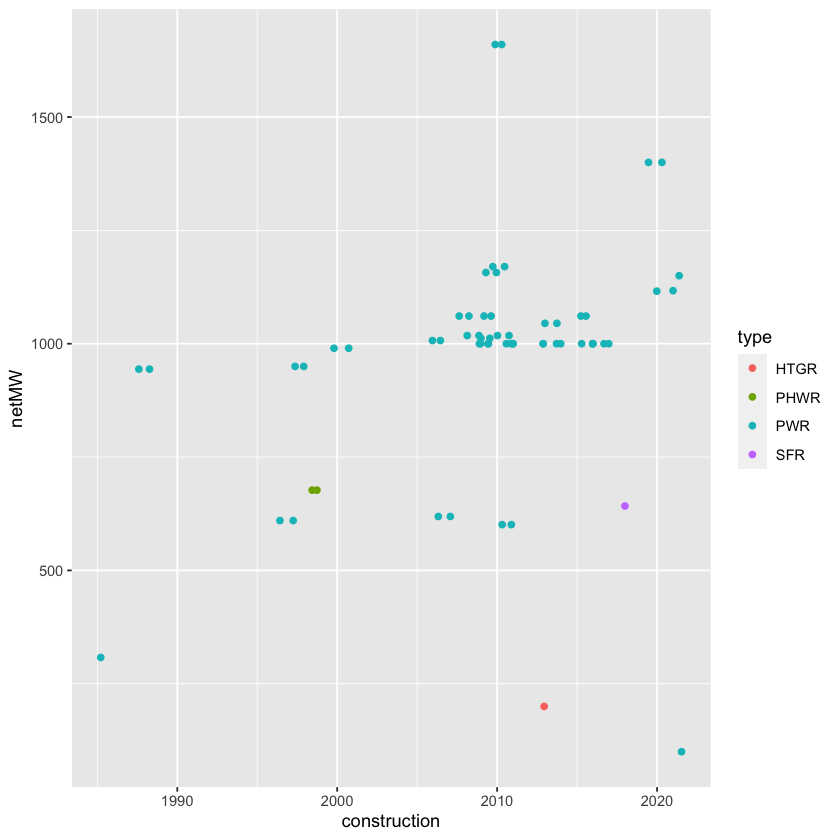

In [105]:
China <-
  tableList[[10]] %>%
    select(1:9)
China <-
  China %>%
    filter(row_number() > 2) %>%
    rename(
      name         = Plantname,
      reactor      = `UnitNo.`,
      type         = Type,
      model        = Model,
      status       = Status,
      netMW        = `Capacity(MW)`,
      construction = Beginbuilding,
      operation    = Commercialoperation,
      closure      = Closed
    )
China <-
  China %>%
    mutate(
      netMW        = as.integer(netMW),
      construction = lubridate::dmy(construction),
      operation    = lubridate::dmy(operation),
      closure      = lubridate::dmy(closure)
    )
China %>%
  ggplot(mapping = aes(x = construction, y = netMW)) +
    geom_point(aes(color = type))

In [106]:
bind_rows(Japan, China) %>%
  mutate(Country = ifelse(name %in% unique(Japan$name), 'Japan', 'China')) %>%
  head()

name              reactor type model status     netMW construction operation 
1 Fukushima Daiichi 1       BWR  BWR-3 Inoperable  439  1967-07-25   1971-03-26
2 Fukushima Daiichi 2       BWR  BWR-4 Inoperable  760  1969-06-09   1974-07-18
3 Fukushima Daiichi 3       BWR  BWR-4 Inoperable  760  1970-12-28   1976-03-27
4 Fukushima Daiichi 4       BWR  BWR-4 Inoperable  760  1973-02-12   1978-10-12
5 Fukushima Daiichi 5       BWR  BWR-4 Shut down   760  1972-05-22   1978-04-18
6 Fukushima Daiichi 6       BWR  BWR-5 Shut down  1067  1973-10-26   1979-10-24
  closure    Country
1 2011-05-19 Japan  
2 2011-05-19 Japan  
3 2011-05-19 Japan  
4 2011-05-19 Japan  
5 2013-12-17 Japan  
6 2013-12-17 Japan

Make an informative graphic that shows how long it took between start of construction and commissioning for operation of each nuclear reactor in Japan (or another country of your choice). One possibility: use reactor name vs date as the frame. For each reactor, set the glyph to be a line extending from start of construction to commissioning. You can do this with `geom_segment()` using name as the y coordinate and time as the x coordinate. (Tip: use the `paste()` function to create the `reactorID` on the vertical axis.)

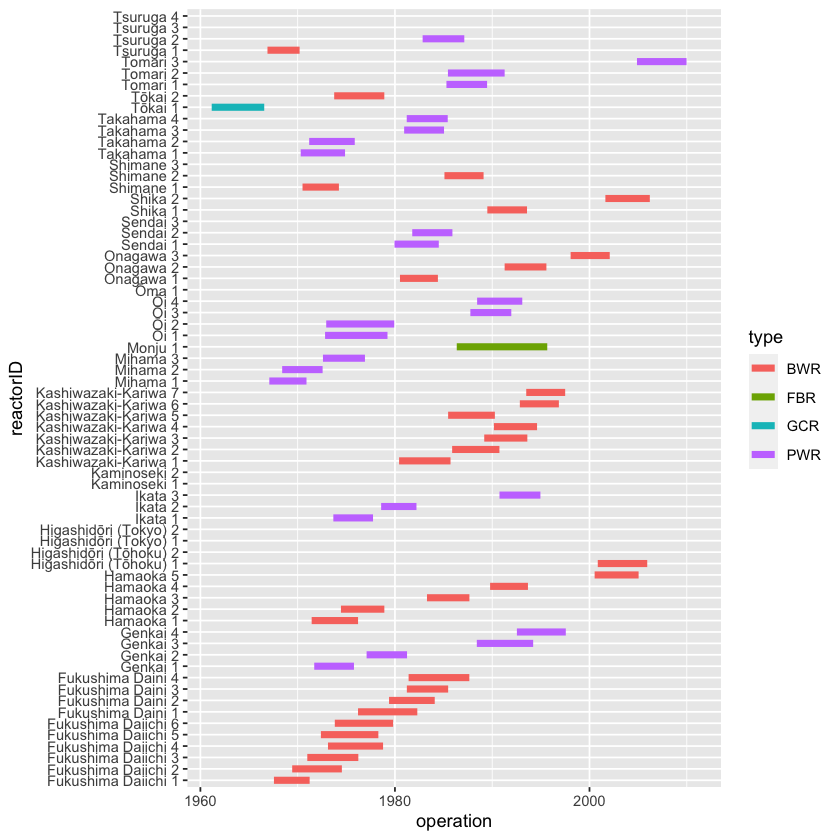

In [107]:
options(warn = -1)

Japan %>%
  mutate(
    reactorID = paste(name, reactor),
    time      = operation - construction
  ) %>%
  ggplot() +
    geom_segment(
      linewidth = 2,
      mapping = aes(
        x     = operation,
        xend  = construction,
        y     = reactorID,
        yend  = reactorID,
        color = type
      )
    )

---

## Project: Street or Road?
[Project: Street or Road?](https://dtkaplan.github.io/DataComputingEbook/project-street-or-road.html#project-street-or-road) from Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

---

### Example

People's addresses involve streets, lanes, courts, avenues, and so on. How many such road-related words are in common use? In answering this question, you would presumably want to look at lots of addresses and extract the road-related term. You could do this by eye, reading down a list of a few hundred or thousand addresses. But if you want to do it on a really large scale, a city or state or country, you would want some automated help, for instance, a computer program that discards the sorts of entries you have already identified to give a greater concentration of unidentified terms. In this activity, you're going to build such a program.

In [108]:
# about 15,000 street addresses of registered voters in Wake County, NC
Addresses <- read_csv('https://mdbeckman.github.io/dcSupplement/data/street-addresses.csv')
head(Addresses)

Rows: 15483 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): address

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


address            
1 2117 MARINER CIRCLE
2 101 EPPING WAY     
3 PO BOX 58592       
4 5102 ECHO RIDGE RD 
5 PO BOX 37218       
6 PO BOX 37218

In [109]:
# about 900,000 medicare service provider street addresses
download.file(url      = 'https://mdbeckman.github.io/dcSupplement/data/CMS_ProvidersSimple.rds',
              destfile = 'CMS_ProvidersSimple.rds')
DataTable <- readRDS('CMS_ProvidersSimple.rds')
head(DataTable)

address                    first_name sex
1 900 SETON DR               ARDALAN    M  
2 2650 RIDGE AVE             THOMAS     M  
3 4126 N HOLLAND SYLVANIA RD RASHID     M  
4 456 MAGEE AVE              DAVID      M  
5 11100 EUCLID AVE           JENNIFER   F  
6 12605 E 16TH AVE           KEVIN      M

To solve such problems, start by looking at a few dozen of the addresses to familiarize yourself with common patterns. Suppose you wanted to extract the PO Box number from an address. Read the street address data and pull out a sample of a few dozen cases.
1. In everyday langauge, describe a pattern that you think will identify the information you are looking for.
    * The PO Box cases tend to have a substring 'PO'.
2. Translate (1) into the form of a regular expression.
    * The regular expression for 'PO' is simply 'PO'.
3. Filter to retain the cases that match the expression. Hint: `filter()` and `grepl()` are useful for this.
4. Filter to retain the cases that do not match the expression.
5. Examine the results of (3) and (4) to identify shortcomings in your patterns.
6. Improve or extend the pattern to deal with the mistaken cases.
7. Repeat until satisfied.
8. Put extraction parentheses around the parts of the regular expression that contain the info you want.

In [116]:
Sample <-
  Addresses %>%
    sample_n(size = 50)
head(Sample)

address             
1 1921 MCKINNEY STREET
2 PO BOX 2973         
3 PO BOX 99181        
4 NCSU BOX 22323      
5 3585 E 10TH ST      
6 PO BOX 96

In [117]:
pattern <- 'PO'

Matches <-
  Sample %>%
    filter(grepl(pattern = pattern, address))
head(Matches)

address     
1 PO BOX 2973 
2 PO BOX 99181
3 PO BOX 96   
4 PO BOX 28454
5 PO BOX 37297
6 PO BOX 26761

In [118]:
Dont <-
  Sample %>%
    filter(!grepl(pattern = 'PO', address))
head(Dont)

address                
1 1921 MCKINNEY STREET   
2 NCSU BOX 22323         
3 3585 E 10TH ST         
4 NCSU BOX 15330         
5 NCSU BOX 04082         
6 251 N  MAIN STREET 3786

In [119]:
pattern <- 'BOX\\s+(\\d+)'

Matches <-
  Sample %>%
    filter( grepl(pattern, address))
head(Matches)

address       
1 PO BOX 2973   
2 PO BOX 99181  
3 NCSU BOX 22323
4 PO BOX 96     
5 PO BOX 28454  
6 NCSU BOX 15330

In [120]:
Dont <-
  Sample %>%
    filter(!grepl(pattern, address))
head(Dont)

address                
1 1921 MCKINNEY STREET   
2 3585 E 10TH ST         
3 251 N  MAIN STREET 3786
4 3307 BROOKLINE COURT   
5 1703 PATTON ROAD       
6 3231 WALNUT CREEK PKWY

In [121]:
BoxNumbers <-
  Sample %>%
    filter(grepl(pattern, address)) %>%
    tidyr::extract(address, into = 'boxnum', regex = pattern)
head(BoxNumbers)

boxnum
1 2973  
2 99181 
3 22323 
4 96    
5 28454 
6 15330

In [122]:
pattern <- 'PO'

Matches <-
  Addresses %>%
    filter(grepl(pattern = pattern, address))
head(Matches)

address     
1 PO BOX 58592
2 PO BOX 37218
3 PO BOX 37218
4 PO BOX 1953 
5 PO BOX 132  
6 PO BOX 360

In [123]:
Dont <-
  Addresses %>%
    filter(!grepl(pattern = 'PO', address))
head(Dont)

address            
1 2117 MARINER CIRCLE
2 101 EPPING WAY     
3 5102 ECHO RIDGE RD 
4 5007 PURITAN RD    
5 04-I ROBIN CIRCLE  
6 4800 WESTERN BLVD

In [124]:
pattern <- 'BOX\\s+(\\d+)'

Matches <-
  Addresses %>%
    filter( grepl(pattern, address))
head(Matches)

address     
1 PO BOX 58592
2 PO BOX 37218
3 PO BOX 37218
4 PO BOX 1953 
5 PO BOX 132  
6 PO BOX 360

In [125]:
Dont <-
  Addresses %>%
    filter(!grepl(pattern, address))
head(Dont)

address            
1 2117 MARINER CIRCLE
2 101 EPPING WAY     
3 5102 ECHO RIDGE RD 
4 5007 PURITAN RD    
5 04-I ROBIN CIRCLE  
6 4800 WESTERN BLVD

In [126]:
BoxNumbers <-
  Addresses %>%
    filter(grepl(pattern, address)) %>%
    tidyr::extract(address, into = 'boxnum', regex = pattern)
head(BoxNumbers)

boxnum
1 58592 
2 37218 
3 37218 
4 1953  
5 132   
6 360

### Back to the Streets

Street endings (e.g., 'ST', 'LANE') are often found at the end of the address string. Use this as a starting point to find the most common endings. Once you have a set of specific street endings, you can use the regex "or" symbol, e.g., '(ST|RD|ROAD)'. The parentheses are not incidental. They are there to mark a pattern that you want to extract. In this case, in addition to knowing that there is a ST or RD or ROAD in an address, you want to know which one of those possibilities it is so that you can count the occurrence of each of the possibilities. To find street endings that aren't in your set, you can filter out the street endings or non street addresses you already know about.

[1] Read the following R statements. Next to each line, give a short explanation of what the line contributes to the task. For each of the regexes, explain in simple everyday language what pattern is being matched.

```r
pattern <- '(ST|RD|ROAD)'

LeftOvers <-
  Addresses %>%
    filter(
      !grepl(pattern, address),                 # matches other than: 'ST' or 'RD' or 'ROAD'
      !grepl('\\sAPT|UNIT\\s[\\d]+$', address), # matches other than: (1 whitespace, 'APT') or ('UNIT', 1 whitespace, 1 or more digits at the end of the string)
      !grepl(' BOX ', address)                  # matches other than: 1 space, 'BOX', 1 space
    )
LeftOvers
```

[2] For each set of patterns that you identify, compute the `LeftOvers`. Examine them visually to find new street endings to add to the pattern, e.g., LANE. When you have this working on the small sample, use a larger sample and, eventually, the whole data set. It's practically impossible to find a method that will work perfectly on new data, but do the best you can. In your report, implement your method and explain how it works, line by line. Present your result: how many addresses there are of each kind of road word?

'DR', 'RD', and 'ST' are the most common street types. In general, abbrviated street types are more common than their longform counterparts.

Breaking addresses into their components is a common task. People who work on this problem intensively sometimes publish their regular expressions. Here's one from Ross Hammer published at https://regexlib.com/Search.aspx?k=street:

```
^\s*((?:(?:\d+(?:\x20+\w+\.?)+(?:(?:\x20+STREET|ST|DRIVE|DR|AVENUE|AVE|ROAD|RD|LOOP|COURT
|CT|CIRCLE|LANE|LN|BOULEVARD|BLVD)\.?)?)|(?:(?:P\.\x20?O\.|P\x20?O)\x20*Box\x20+\d+)|
(?:General\x20+Delivery)|(?:C[\\\/]O\x20+(?:\w+\x20*)+))\,?\x20*(?:(?:(?:APT|BLDG|DEPT|
FL|HNGR|LOT|PIER|RM|S(?:LIP|PC|T(?:E|OP))|TRLR|UNIT|\x23)\.?\x20*(?:[a-zA-Z0-9\-]+))|
(?:BSMT|FRNT|LBBY|LOWR|OFC|PH|REAR|SIDE|UPPR))?)\,?\s+((?:(?:\d+(?:\x20+\w+\.?)+
(?:(?:\x20+STREET|ST|DRIVE|DR|AVENUE|AVE|ROAD|RD|LOOP|COURT|CT|CIRCLE|LANE|LN|BOULEVARD|
BLVD)\.?)?)|(?:(?:P\.\x20?O\.|P\x20?O)\x20*Box\x20+\d+)|(?:General\x20+Delivery)|
(?:C[\\\/]O\x20+(?:\w+\x20*)+))\,?\x20*(?:(?:(?:APT|BLDG|DEPT|FL|HNGR|LOT|PIER|RM|
S(?:LIP|PC|T(?:E|OP))|TRLR|UNIT|\x23)\.?\x20*(?:[a-zA-Z0-9\-]+))|(?:BSMT|FRNT|LBBY|
LOWR|OFC|PH|REAR|SIDE|UPPR))?)?\,?\s+((?:[A-Za-z]+\x20*)+)\,\s+(A[LKSZRAP]|C[AOT]|
D[EC]|F[LM]|G[AU]|HI|I[ADLN]|K[SY]|LA|M[ADEHINOPST]|N[CDEHJMVY]|O[HKR]|P[ARW]|RI|
S[CD]|T[NX]|UT|V[AIT]|W[AIVY])\s+(\d+(?:-\d+)?)\s*$
```

In [112]:
Addresses %>%
  filter(
    !grepl(pattern = ' AVENUE |AVENUE$', x = address),       # matches other than: 'AVENUE' flanked by whitespace anywhere in the string, or 'AVENUE' at the end of the string
    !grepl(pattern = ' AVE |AVE$', x = address),             # matches other than: 'AVE' flanked by whitespace anywhere in the string, or 'AVE' at the end of the string
    !grepl(pattern = ' BLVD |BLVD$', x = address),           # matches other than: 'BLVD' flanked by whitespace anywhere in the string, or 'BLVD' at the end of the string
    !grepl(pattern = ' BOULEVARD |BOULEVARD$', x = address), # matches other than: 'BOULEVARD' flanked by whitespace anywhere in the string, or 'BOULEVARD' at the end of the string
    !grepl(pattern = ' CIR |CIR$', x = address),             # matches other than: 'CIR' flanked by whitespace anywhere in the string, or 'CIR' at the end of the string
    !grepl(pattern = ' CIRCLE |CIRCLE$', x = address),       # matches other than: 'CIRCLE' flanked by whitespace anywhere in the string, or 'CIRCLE' at the end of the string
    !grepl(pattern = ' CT |CT$', x = address),               # matches other than: 'CT' flanked by whitespace anywhere in the string, or 'CT' at the end of the string
    !grepl(pattern = ' COURT |COURT$', x = address),         # matches other than: 'COURT' flanked by whitespace anywhere in the string, or 'COURT' at the end of the string
    !grepl(pattern = ' DR |DR$', x = address),               # matches other than: 'DR' flanked by whitespace anywhere in the string, or 'DR' at the end of the string
    !grepl(pattern = ' DRIVE |DRIVE$', x = address),         # matches other than: 'DRIVE' flanked by whitespace anywhere in the string, or 'DRIVE' at the end of the string
    !grepl(pattern = ' LN |LN$', x = address),               # matches other than: 'LN' flanked by whitespace anywhere in the string, or 'LN' at the end of the string
    !grepl(pattern = ' LANE |LANE$', x = address),           # matches other than: 'LANE' flanked by whitespace anywhere in the string, or 'LANE' at the end of the string
    !grepl(pattern = ' PL |PL$', x = address),               # matches other than: 'PL' flanked by whitespace anywhere in the string, or 'PL' at the end of the string
    !grepl(pattern = ' PLACE |PLACE$', x = address),         # matches other than: 'PLACE' flanked by whitespace anywhere in the string, or 'PLACE' at the end of the string
    !grepl(pattern = ' RD |RD$', x = address),               # matches other than: 'RD' flanked by whitespace anywhere in the string, or 'RD' at the end of the string
    !grepl(pattern = ' ROAD |ROAD$', x = address),           # matches other than: 'ROAD' flanked by whitespace anywhere in the string, or 'ROAD' at the end of the string
    !grepl(pattern = ' ST |ST$', x = address),               # matches other than: 'ST' flanked by whitespace anywhere in the string, or 'ST' at the end of the string
    !grepl(pattern = ' STREET |STREET$', x = address),       # matches other than: 'STREET' flanked by whitespace anywhere in the string, or 'STREET' at the end of the string
    !grepl(pattern = ' TRAIL |TRAIL$', x = address),         # matches other than: 'TRAIL' flanked by whitespace anywhere in the string, or 'TRAIL' at the end of the string
    !grepl(pattern = ' WAY |WAY$', x = address),             # matches other than: 'WAY' flanked by whitespace anywhere in the string, or 'WAY' at the end of the string
    !grepl(pattern = ' WINERY |WINERY$', x = address),       # matches other than: 'WINERY' flanked by whitespace anywhere in the string, or 'WINERY' at the end of the string
    !grepl(pattern = 'BOX\\s+(\\d+)', x = address)           # filters out all the 'BOX' from above
  ) %>%
  head()

address                
1 NCSU B0X 15637         
2 HMIA-267               
3 1104 PULLEN HALL       
4 311 BAREFOOT           
5 512  LIVE OAK          
6 1706 WINGATE UNIVERSITY

In [113]:
pattern <- '\\s+('
pattern <- str_c(pattern, 'AVE|AVENUE')
pattern <- str_c(pattern, '|BLVD|BOULEVARD')
pattern <- str_c(pattern, '|CIR|CIRCLE')
pattern <- str_c(pattern, '|CT|COURT')
pattern <- str_c(pattern, '|DR|DRIVE')
pattern <- str_c(pattern, '|LN|LANE')
pattern <- str_c(pattern, '|PL|PLACE')
pattern <- str_c(pattern, '|RD|ROAD')
pattern <- str_c(pattern, '|ST|STREET')
pattern <- str_c(pattern, '|TRAIL')
pattern <- str_c(pattern, '|WAY')
pattern <- str_c(pattern, '|WINERY')
pattern <- str_c(pattern, ')(\\s+|$)?')
pattern

streets <-
  Addresses %>%
    filter(
      grepl(x = address, pattern = pattern, ignore.case = TRUE)
    ) %>%
    tidyr::extract(
      col   = address,
      regex = pattern,
      into  = c(
        'street',
        ' '
      )
    ) %>%
    group_by(street) %>%
    summarize(total = n()) %>%
    arrange(desc(total))
streets

[1] "\\s+(AVE|AVENUE|BLVD|BOULEVARD|CIR|CIRCLE|CT|COURT|DR|DRIVE|LN|LANE|PL|PLACE|RD|ROAD|ST|STREET|TRAIL|WAY|WINERY)(\\s+|$)?"

street    total
1  DR        888  
2  RD        688  
3  ST        676  
4  AVE       259  
5  CT        229  
6  ROAD      188  
7  LN        152  
8  PL        145  
9  LANE      141  
10 CIR       120  
11 WAY       113  
12 COURT      90  
13 BLVD       50  
14 TRAIL      26  
15 BOULEVARD   4  
16 WINERY      1

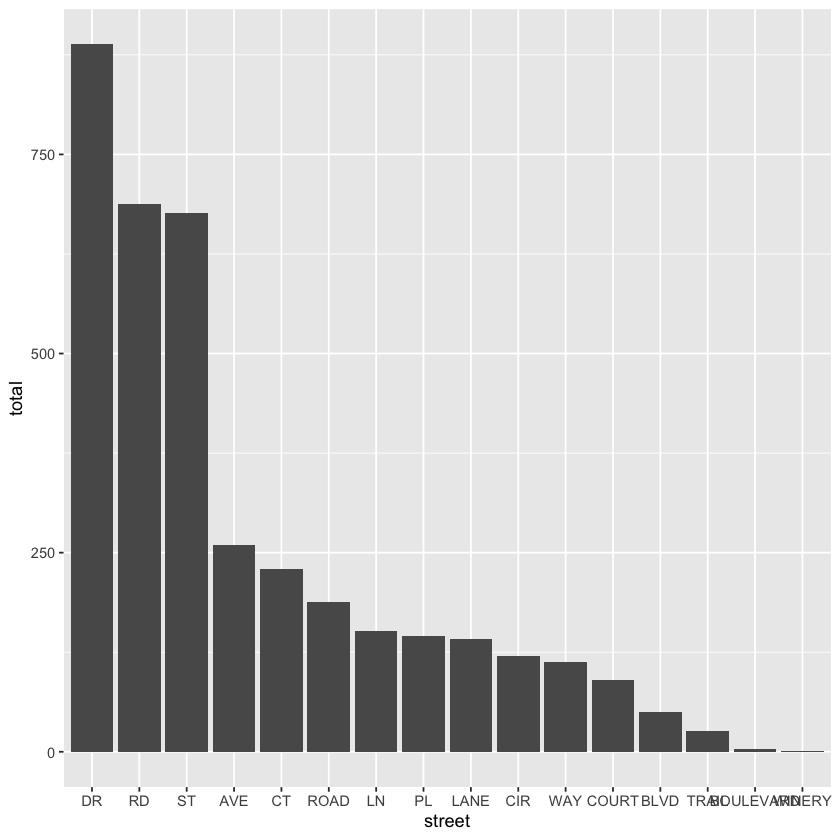

In [115]:
streets %>%
  ggplot(aes(x = reorder(street, -total), y = total)) +
    geom_col() +
    xlab('street')

---

## Bibliography

Kaplan, Daniel & Matthew Beckman. (2021). _Data Computing_. 2nd Ed. [Home](https://dtkaplan.github.io/DataComputingEbook/).

---